In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import plotly.express as px
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
from scipy.stats import mode

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('white')

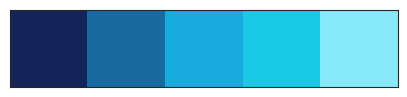

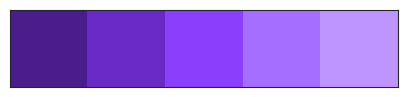

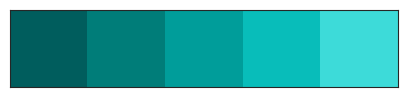

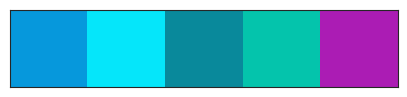

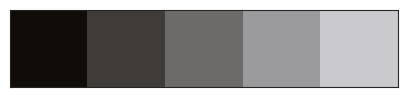

In [4]:
# --- Creating List of Color Palletes ---
cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
teal_grad = ['#005D5D', '#007D79', '#009D9A', '#08BDBA', '#3DDBD9']
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Ploting Color Palletes ---
sns.palplot(cyan_grad)
sns.palplot(purple_grad)
sns.palplot(teal_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [8]:
# Reading the Train and Test CSV files
train = pd.read_csv("Train .csv")
test = pd.read_csv("Test .csv")

In [9]:
# --- Reading Train Dataset ---
train.head(10).style.background_gradient(cmap='YlOrRd').set_properties(**{'border': '1px solid black'})

In [10]:
# --- Describing Train Dataset ---
print('.: Train Dataset Description :.')
print('*' * 31)
train.describe(include='all').style.set_properties(**{'border': '1px solid black'})

.: Train Dataset Description :.
*******************************


In [11]:
# --- Printing Train Dataset Info ---
print('.: Train Dataset Info :.')
print('*' * 23)
print('Total Rows:', train.shape[0])
print('Total Columns:', train.shape[1])

.: Train Dataset Info :.
***********************
Total Rows: 8523
Total Columns: 12


In [12]:
# --- Printing Train Dataset Detail ---
print('.: Train Dataset Details :.')
print('*' * 27)
train.info()

.: Train Dataset Details :.
***************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage:

In [13]:
# --- Reading Test Dataset ---
test.head(10).style.background_gradient(cmap='summer').set_properties(**{'border': '1px solid black'})

In [14]:
# --- Describing Test Dataset ---
print('.: Test Dataset Description :.')
print('*' * 30)
test.describe(include='all').style.set_properties(**{'border': '1px solid black'})

.: Test Dataset Description :.
******************************


In [15]:
# --- Printing Test Dataset Info ---
print('.: Test Dataset Info :.')
print('*' * 23)
print('Total Rows:', test.shape[0])
print('Total Columns:', test.shape[1])

.: Test Dataset Info :.
***********************
Total Rows: 5681
Total Columns: 11


In [16]:
# --- Printing Test Dataset Detail ---
print('.: Test Dataset Details :.')
print('*' * 27)
test.info()

.: Test Dataset Details :.
***************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [17]:
# --- Join both the train and test dataset ---
train['source']='Train'
test['source']='Test'

dataset = pd.concat([train,test], ignore_index = True)

print('.: Train Dataset Shape :.')
print('*' * 25)
print('Total Rows:', train.shape[0])
print('Total Columns:', train.shape[1])

print('\n.: Test Dataset Shape :.')
print('*' * 24)
print('Total Rows:', test.shape[0])
print('Total Columns:', test.shape[1])


print('\n.: Concatenated Dataset Shape :.')
print('*' * 32)
print('Total Rows:', dataset.shape[0])
print('Total Columns:', dataset.shape[1])

.: Train Dataset Shape :.
*************************
Total Rows: 8523
Total Columns: 13

.: Test Dataset Shape :.
************************
Total Rows: 5681
Total Columns: 12

.: Concatenated Dataset Shape :.
********************************
Total Rows: 14204
Total Columns: 13


In [18]:
# --- Reading Combined Dataset (From Top) ---
dataset.head(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [19]:
# --- Reading Combined Dataset (From Bottom) ---
dataset.tail(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [20]:
# --- Printing Combined Dataset Detail ---
print('.: Combined Dataset Details :.')
print('*' * 30)
dataset.info()

.: Combined Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-nul

In [21]:
# --- Percentage of test set in the dataset ---
print('.: Percentage of Test Dataset in Combined Dataset :.')
print('*' * 52)
print(dataset["Item_Outlet_Sales"].isnull().sum()/dataset.shape[0]*100,"%")

.: Percentage of Test Dataset in Combined Dataset :.
****************************************************
39.995775837792166 %


In [22]:
# --- Data Visualization for Item_Type in train dataset ---
# --- Setting Colors, Labels, Order ---
colors=teal_grad
label1=train['Item_Type'].dropna().unique()
order1=train['Item_Type'].value_counts().index

# --- Counting Categorical Labels without Dropping Null Values ---
print('*' * 36)
print('.: Item Type List (Train Dataset) :.')
print('*' * 36)
train.Item_Type.value_counts(dropna=False)

************************************
.: Item Type List (Train Dataset) :.
************************************


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

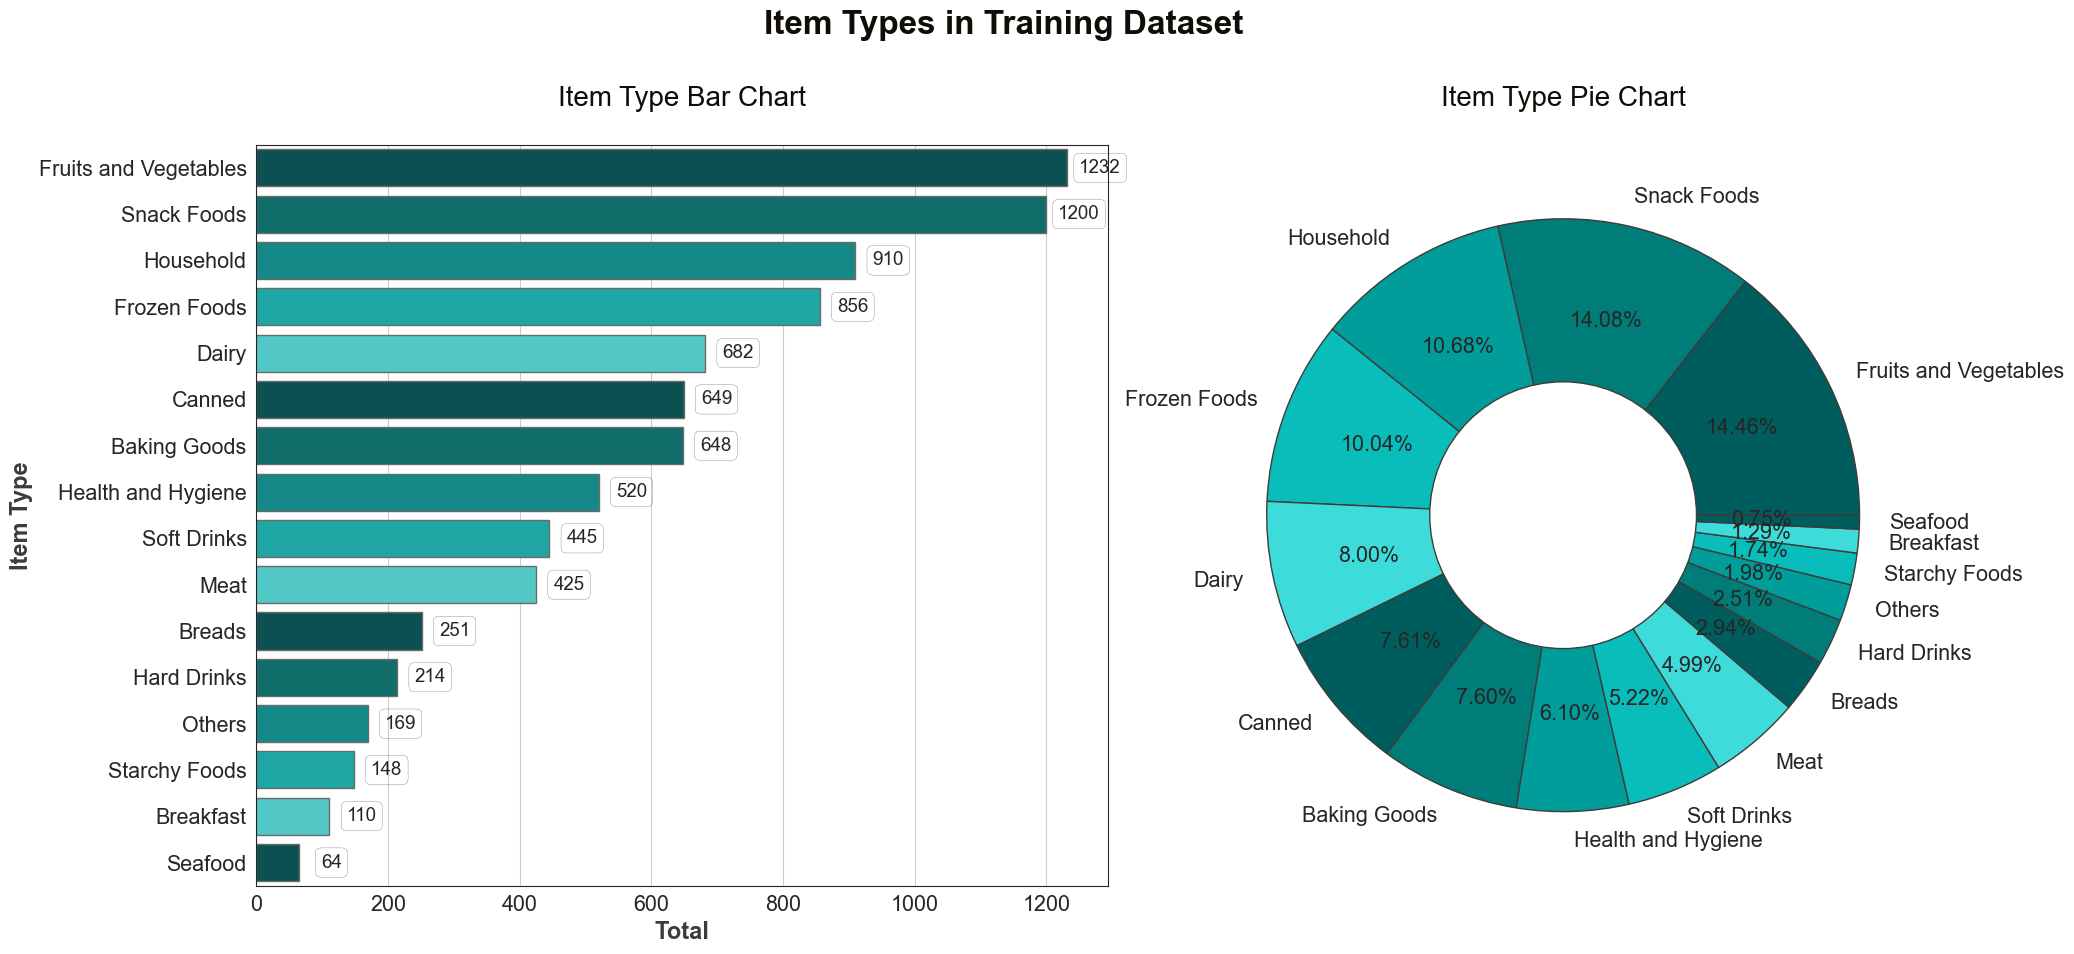

In [23]:
# --- Size for Both Figures ---
plt.figure(figsize=(20, 10))
plt.suptitle('Item Types in Training Dataset', fontweight='bold', fontsize='24', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Item Type Bar Chart\n', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(y='Item_Type', data=train, palette=colors, order=order1, edgecolor=black_grad[2])
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width+50, y+height/2, '{:.0f}'.format(width), horizontalalignment='center', verticalalignment='center', fontsize=13.5, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.tight_layout(rect=[0, 0.04, 1, 0.965])
plt.xlabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Item Type', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='x');
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Item Type Pie Chart\n', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
plt.pie(train['Item_Type'].value_counts(), labels=order1, colors=colors, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(edgecolor=black_grad[1]), textprops={'fontsize':15.5})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

In [24]:
# --- Data Visualization for Item_Type in test dataset ---
# --- Setting Colors, Labels, Order ---
colors=teal_grad
label2=test['Item_Type'].dropna().unique()
order2=test['Item_Type'].value_counts().index

# --- Counting Categorical Labels without Dropping Null Values ---
print('*' * 35)
print('.: Item Type List (Test Dataset) :.')
print('*' * 35)
test.Item_Type.value_counts(dropna=False)

***********************************
.: Item Type List (Test Dataset) :.
***********************************


Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64

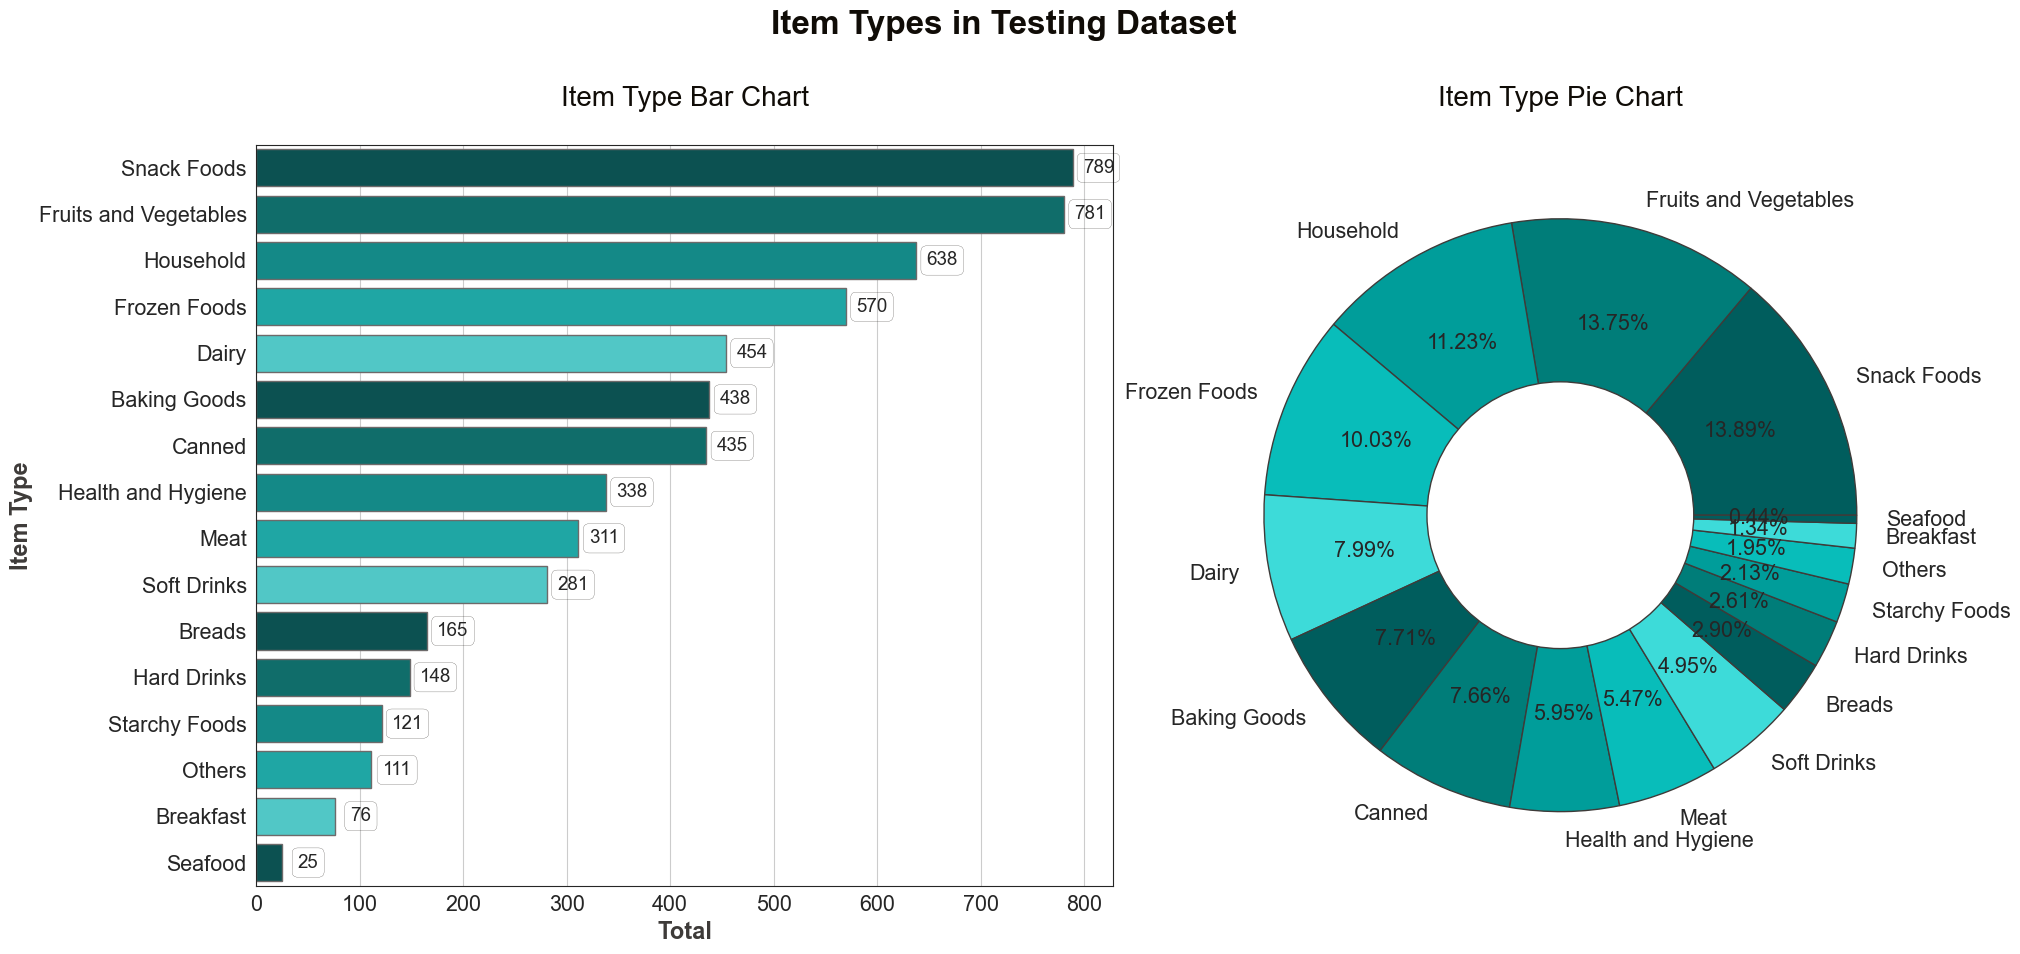

In [25]:
# --- Size for Both Figures ---
plt.figure(figsize=(20, 10))
plt.suptitle('Item Types in Testing Dataset', fontweight='bold', fontsize='24', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Item Type Bar Chart\n', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(y='Item_Type', data=test, palette=colors, order=order2, edgecolor=black_grad[2])
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width+25, y+height/2, '{:.0f}'.format(width), horizontalalignment='center', verticalalignment='center',fontsize=13.5, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.tight_layout(rect=[0, 0.04, 1, 0.965])
plt.xlabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Item Type', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='x');
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Item Type Pie Chart\n', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
plt.pie(test['Item_Type'].value_counts(), labels=order2, colors=colors, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(edgecolor=black_grad[1]), textprops={'fontsize':15.5})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

.: Combined Dataset Null Values:.
*********************************


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

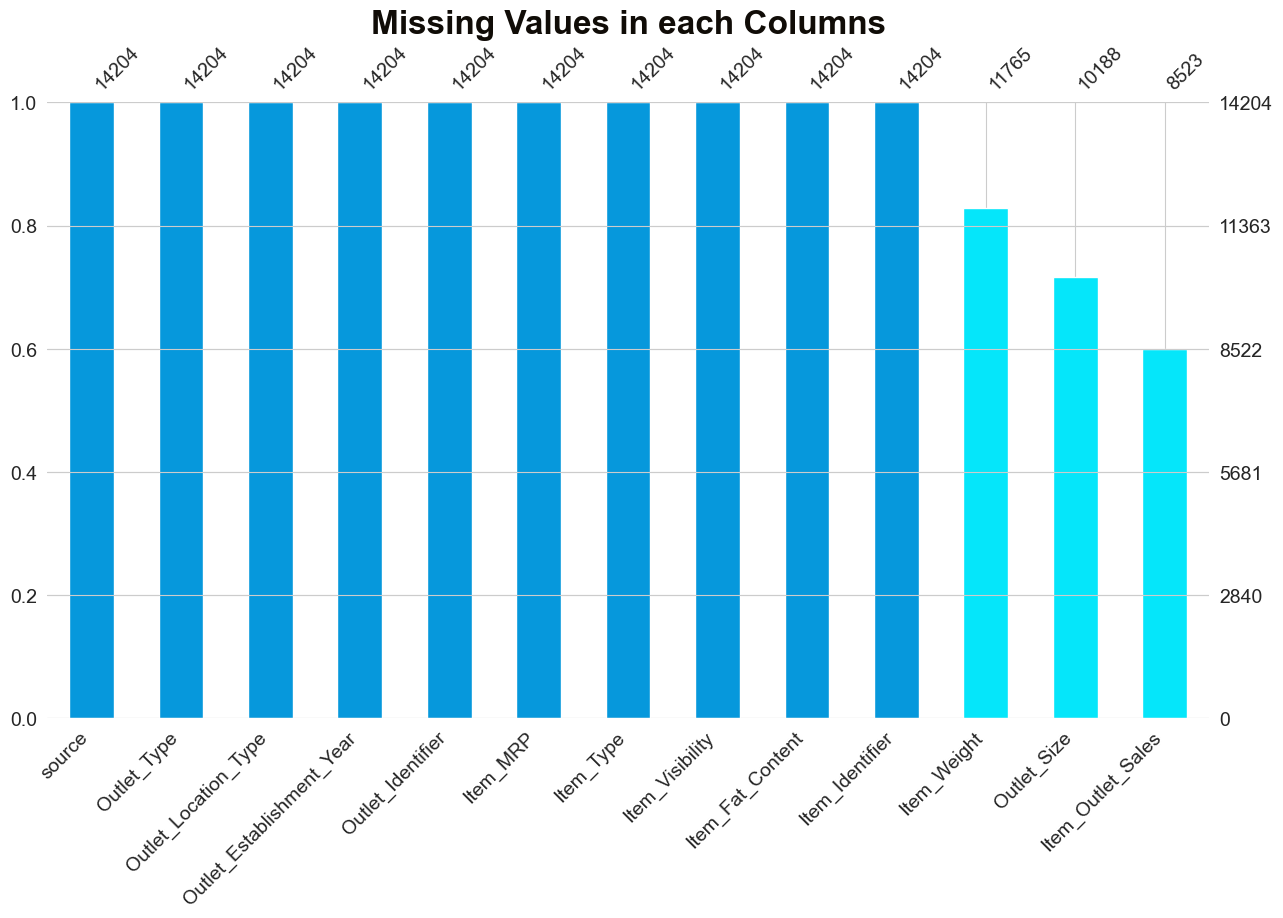

In [26]:
sns.set_style('whitegrid')

# --- Ploting Missing Values ---
mso.bar(dataset, fontsize=14, color=[color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[1], color_mix[1],color_mix[1]], figsize=(15, 8), sort='descending', labels=True)

# --- Title Settings ---
plt.title('Missing Values in each Columns', fontweight='bold', fontsize='24', fontfamily='sans-serif', color=black_grad[0])
plt.grid(axis='both', alpha=0);

# ---Checking Null Values in Combined Dataset ---
print('.: Combined Dataset Null Values:.')
print('*' * 33)
dataset.isnull().sum()

In [27]:
# --- Calculating mean value of Item_Weight for every Unique item present in dataset ---
# --- pivot_table() allows us to create a table that contains the mean values of identifiers ---
avg = pd.pivot_table(dataset,values='Item_Weight', index='Item_Identifier',aggfunc='mean')
avg

Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]

In [28]:
# --- Cross verifying the mean value by checking a particular item in dataset ---
df=dataset[dataset['Item_Identifier'].str.contains("DRA24")]
df.style.set_properties(**{'border': '1px solid black'})

In [29]:
# --- Updating the null weight values of dataset with mean values ---
dataset[:][dataset['Item_Identifier'] == 'DRI11']
def impute(cols):
    Weight = cols[1]
    Identifier = cols[0]
    
    if pd.isnull(Weight):
        return avg['Item_Weight'][avg.index == Identifier]
    else:
        return Weight

print ('Orignal Number of missing values in Item_Weight:',sum(dataset['Item_Weight'].isnull()))

# --- Applying the impute() function to impute null values of Item_Weight ---
dataset['Item_Weight'] = dataset[['Item_Identifier','Item_Weight']].apply(impute,axis=1).astype(float)

print ('Number of missing values in Item_Weight after imputation: ',sum(dataset['Item_Weight'].isnull()))

Orignal Number of missing values in Item_Weight: 2439
Number of missing values in Item_Weight after imputation:  0


In [30]:
# --- Cross verifying the mean value is updated or not by checking a particular item in dataset ---
df=dataset[dataset['Item_Identifier'].str.contains("DRA24")]
df.style.set_properties(**{'border': '1px solid black'})

.: Outlet Type Combined Data :.
*******************************


Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

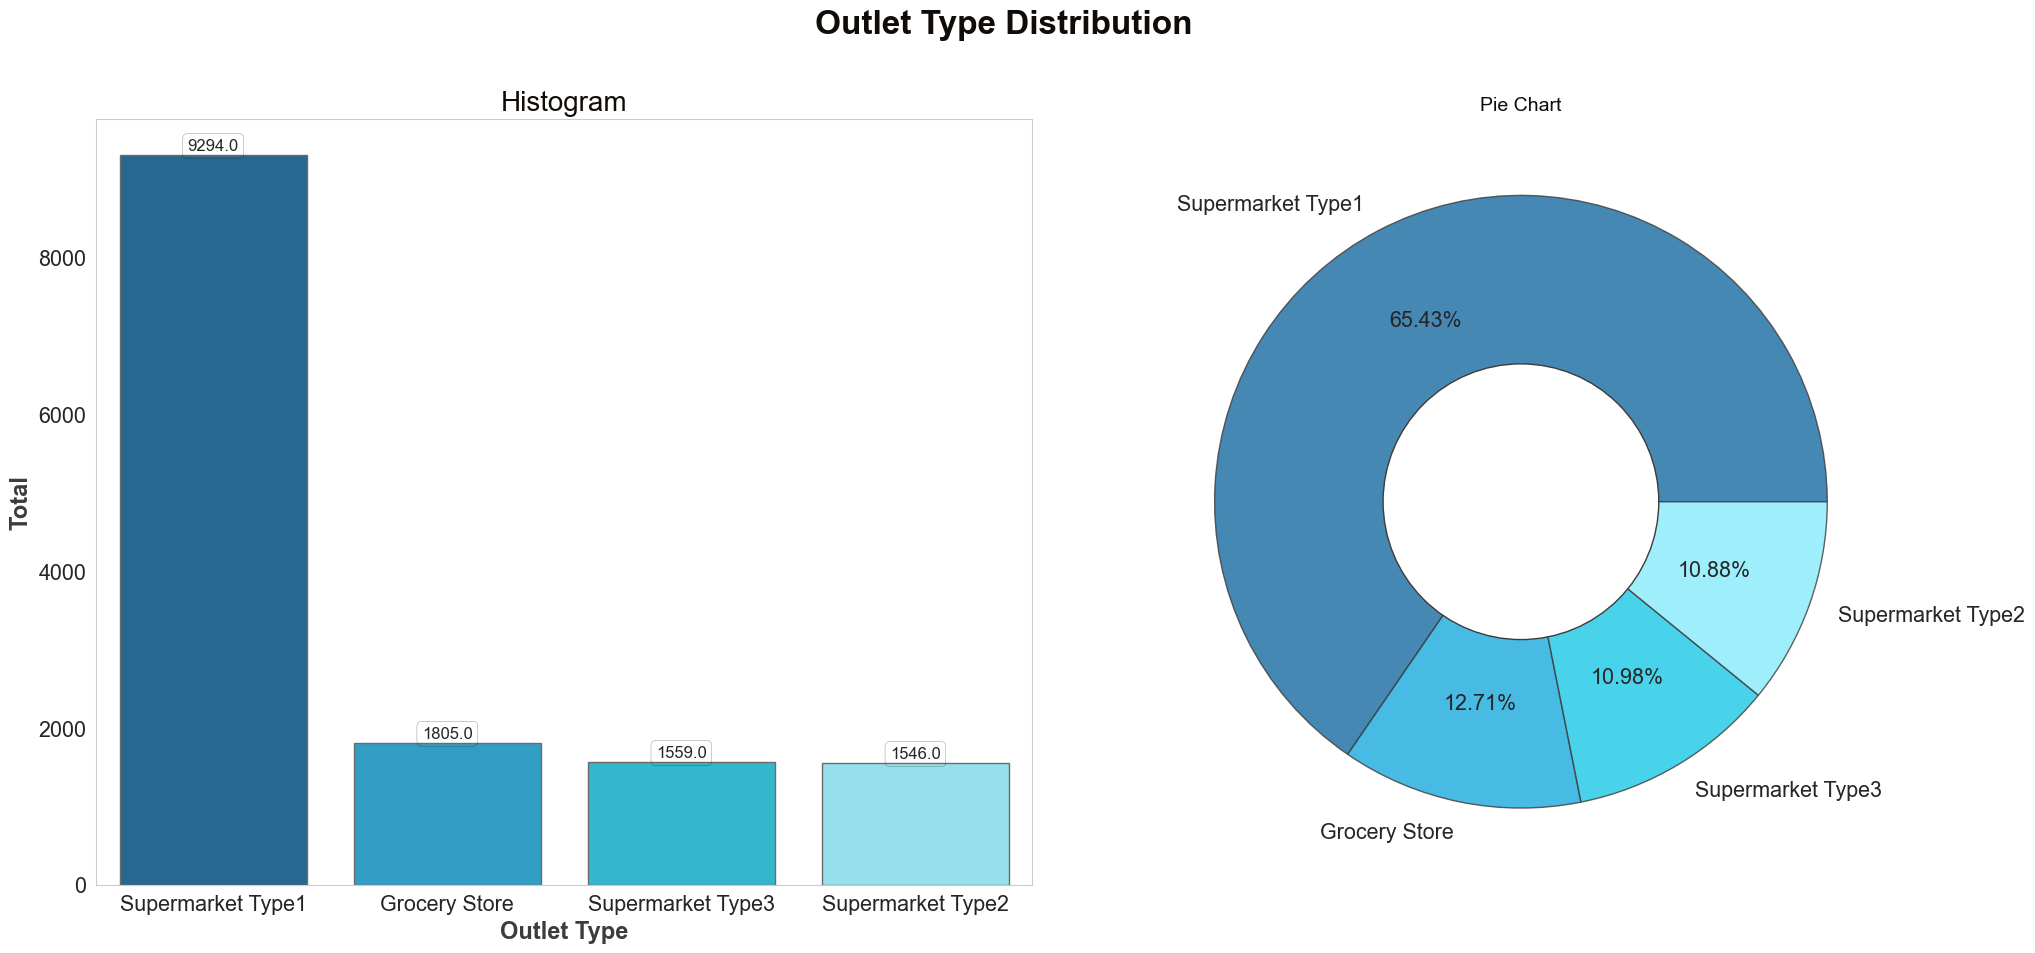

In [31]:
# --- Data Visualization for Outlet Type of Comined Dataset ---
# --- Setting Colors, Labels, Order ---
colors=cyan_grad[1:5]
labels=dataset['Outlet_Type'].dropna().unique()
order=dataset['Outlet_Type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(20, 10))
plt.suptitle('Outlet Type Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Type', data=dataset, palette=colors, order=order, edgecolor=black_grad[2])
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Type', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(dataset['Outlet_Type'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':15.5})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels without Dropping Null Values ---
print('.: Outlet Type Combined Data :.')
print('*' * 31)
dataset.Outlet_Type.value_counts(dropna=False)

.: Outlet Size Total :.
***********************


Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: count, dtype: int64

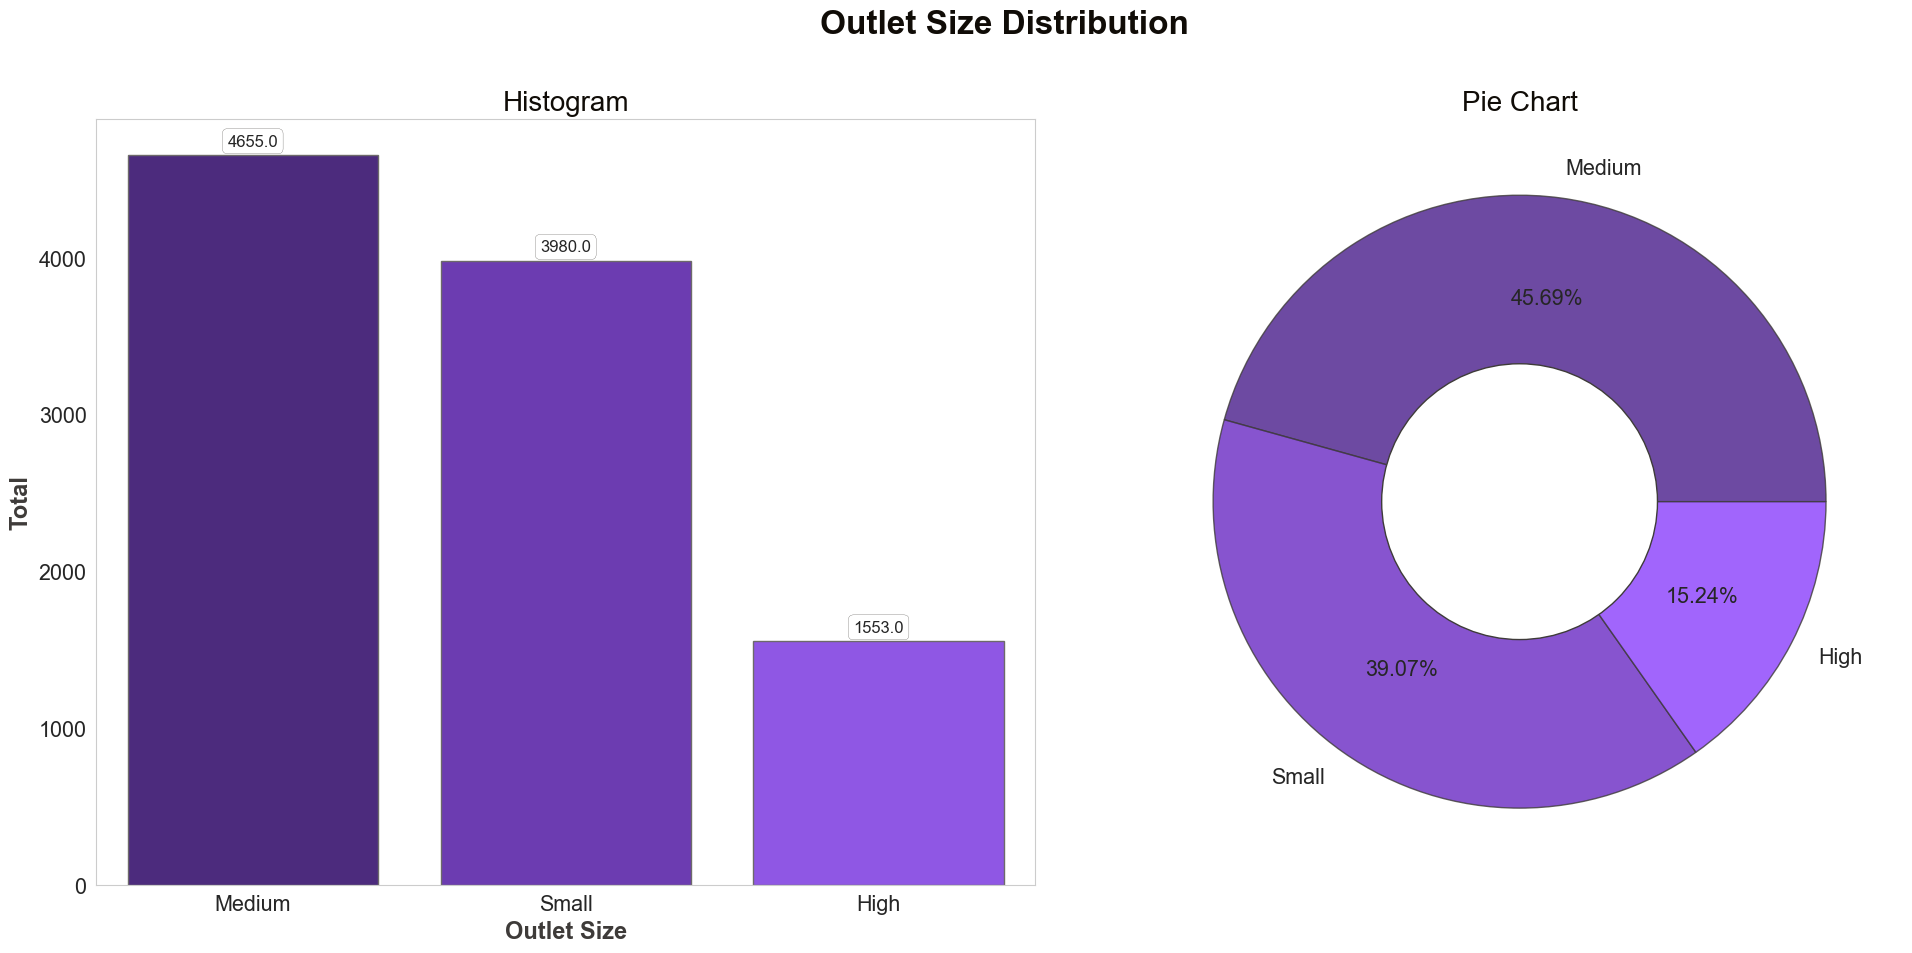

In [32]:
# --- Data Visualization for Outlet Size of Combined Dataset(including null values) ---
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=dataset['Outlet_Size'].dropna().unique()
order=dataset['Outlet_Size'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(20,10))
plt.suptitle('Outlet Size Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Size', data=dataset, palette=colors, order=order, edgecolor=black_grad[2])
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Size', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
plt.pie(dataset['Outlet_Size'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':15.5})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels without Dropping Null Values ---
print('.: Outlet Size Total :.')
print('*' * 23)
dataset.Outlet_Size.value_counts(dropna=False)

In [33]:
# --- Calculating mode value of Outlet Size for every Unique Outlet Type present in dataset ---
# --- pivot_table() allows us to create a table that contains the mode of identifiers ---
mode = pd.pivot_table(dataset, values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [34]:
# --- Updating the null outlet size values of dataset with mode values ---
# --- Imputing Outlet_Size missing values with their mode ---
def impute_mode(cols):
    size = cols[1]
    Type = cols[0]
    
    if pd.isnull(size):
        return mode.loc['Outlet_Size'][mode.columns == Type][0]
    else:
        return size
print ('Orignal Number of missing values in Outlet_Size:',sum(dataset['Outlet_Size'].isnull()))

# Applying the impute() function to impute null values of Item_Weight
dataset['Outlet_Size'] = dataset[['Outlet_Type','Outlet_Size']].apply(impute_mode,axis=1)

print ('Number of missing values in Outlet_Size after imputation: ',sum(dataset['Outlet_Size'].isnull()))

Orignal Number of missing values in Outlet_Size: 4016
Number of missing values in Outlet_Size after imputation:  0


.: Outlet Size Total :.
*************************


Outlet_Size
Small     7996
Medium    4655
High      1553
Name: count, dtype: int64

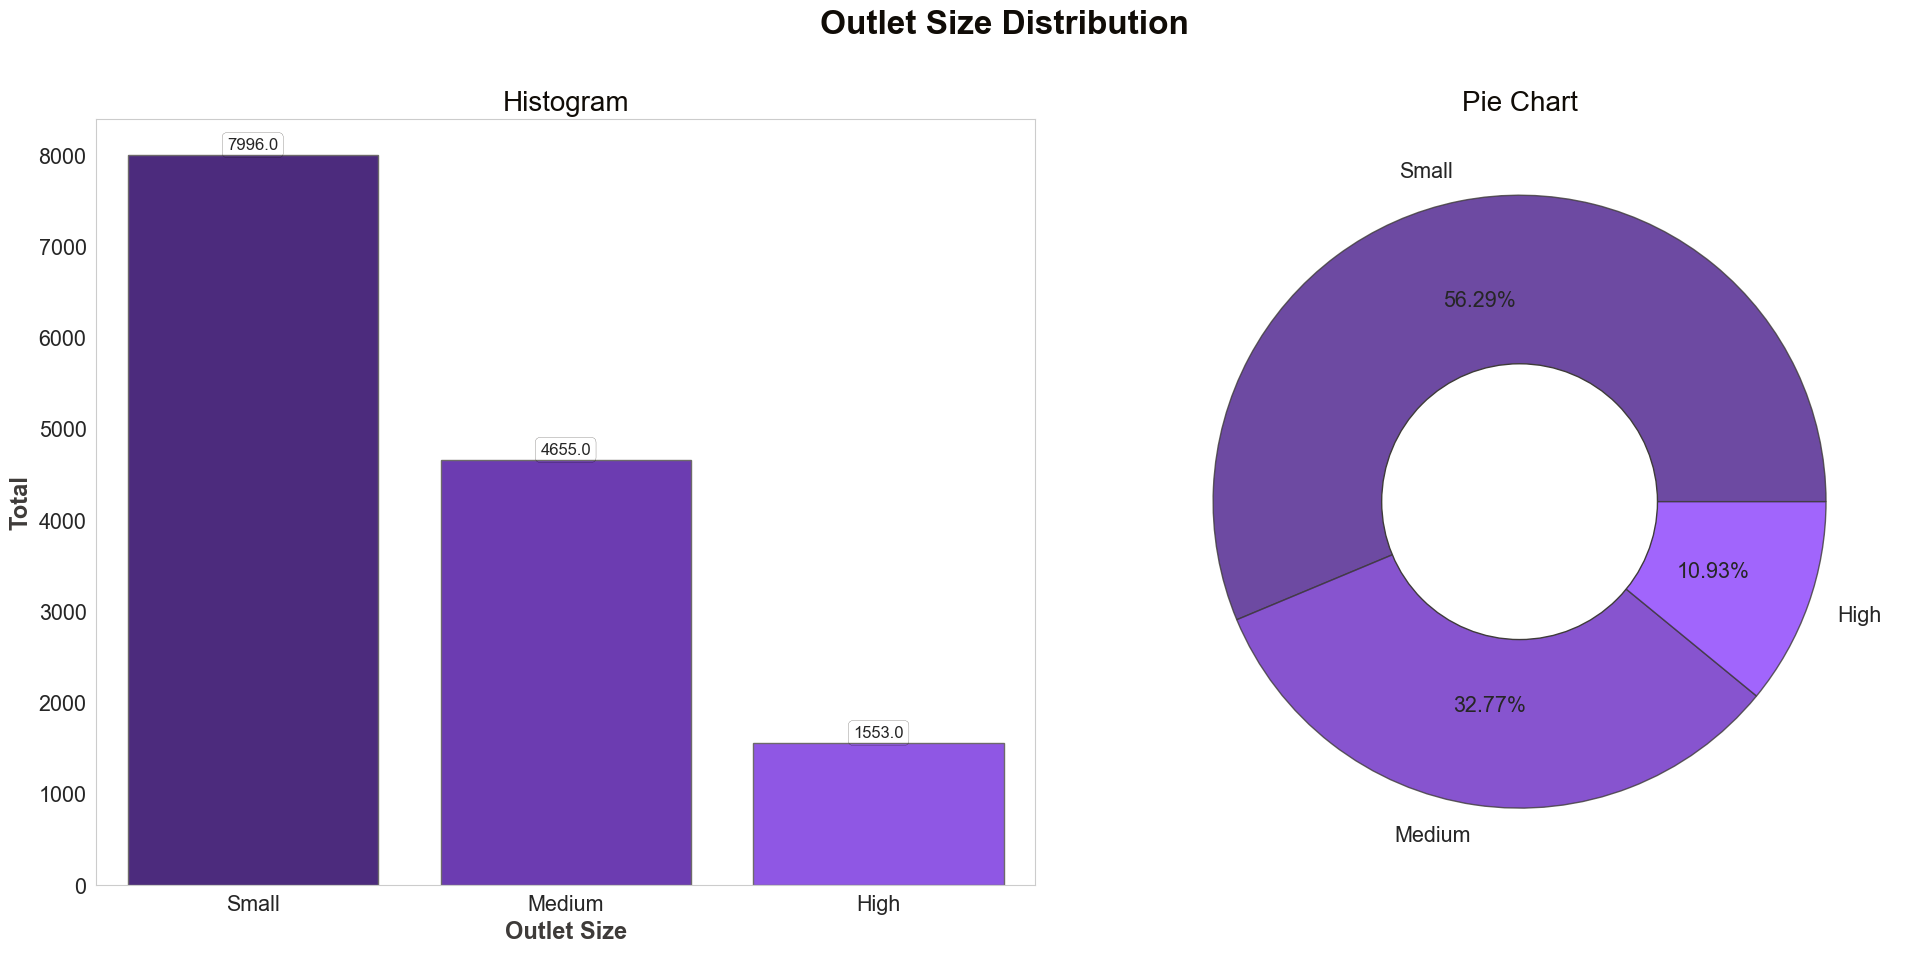

In [35]:
# --- Data Visualization for Outlet Size of Combined Dataset ---
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=dataset['Outlet_Size'].dropna().unique()
order=dataset['Outlet_Size'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(20,10))
plt.suptitle('Outlet Size Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Size', data=dataset, palette=colors, order=order, edgecolor=black_grad[2])
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Size', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
plt.pie(dataset['Outlet_Size'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':15.5})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('.: Outlet Size Total :.')
print('*' * 25)
dataset.Outlet_Size.value_counts(dropna=False)

In [36]:
# --- Data Visualization for Outlet Type and Outlet Size of Combined Dataset ---
fig1=px.sunburst(dataset,path=['Outlet_Type','Outlet_Location_Type'],color_continuous_scale='RdBu')
fig1.update_layout(title='Outlet Type with Outlet Size',title_x=0.5)
fig1.show()

.: Combined Dataset Null Values:.
*********************************


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

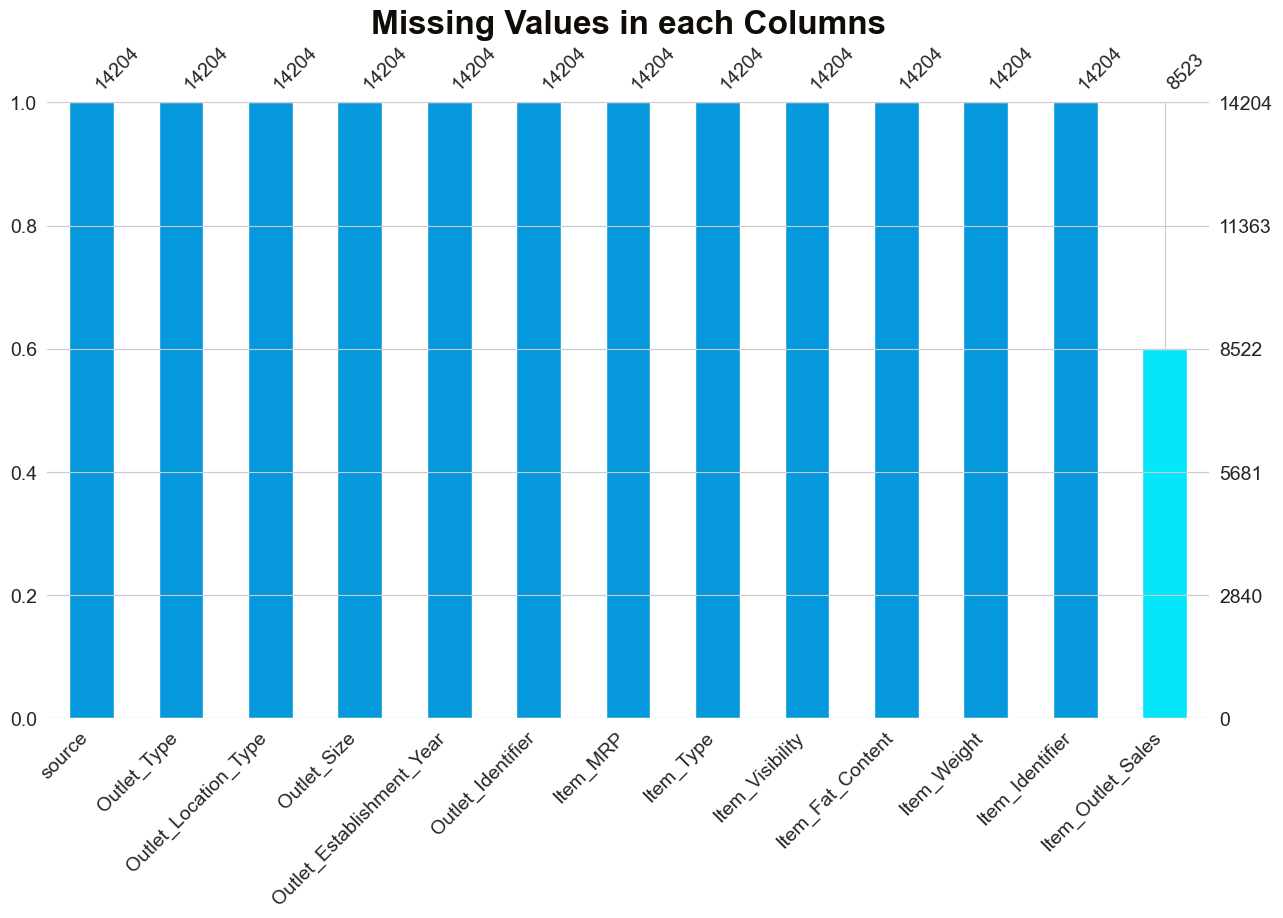

In [37]:
# --- Ploting / Checking Missing Values ---
mso.bar(dataset, fontsize=14, color=[color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0],color_mix[1]], figsize=(15, 8), sort='descending', labels=True)

# --- Title & Subtitle Settings ---
plt.title('Missing Values in each Columns', fontweight='bold', fontsize='24', fontfamily='sans-serif', color=black_grad[0])
plt.grid(axis='both', alpha=0);

# --- Checking Null Values in Combined Dataset ---
print('.: Combined Dataset Null Values:.')
print('*' * 33)
dataset.isnull().sum()

In [38]:
# --- Reading Combined Dataset after data processing (Adding missing values) ---
dataset.head(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [39]:
# --- Reading Combined Dataset after data processing (Adding missing values) ---
dataset.tail(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [40]:
# --- Counting Categorical Labels (Outlet Identifier) without Dropping Null Values ---
print('.: Outlet_Identifier Total :.')
print('*' * 29)
dataset.Outlet_Identifier.value_counts(dropna=False)

.: Outlet_Identifier Total :.
*****************************


Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

In [41]:
# --- Data Visualization for Item Fat Content of Combined Dataset(including similar values) ---
# --- Setting Colors, Labels, Order ---
colors=color_mix
labels=dataset['Item_Fat_Content'].dropna().unique()
order=dataset['Item_Fat_Content'].value_counts().index

# --- Counting Categorical Labels (Item Fat Content) without Dropping Null Values ---
print('.: Item Fat Content Total :.')
print('*' * 29)
dataset.Item_Fat_Content.value_counts(dropna=False)

.: Item Fat Content Total :.
*****************************


Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

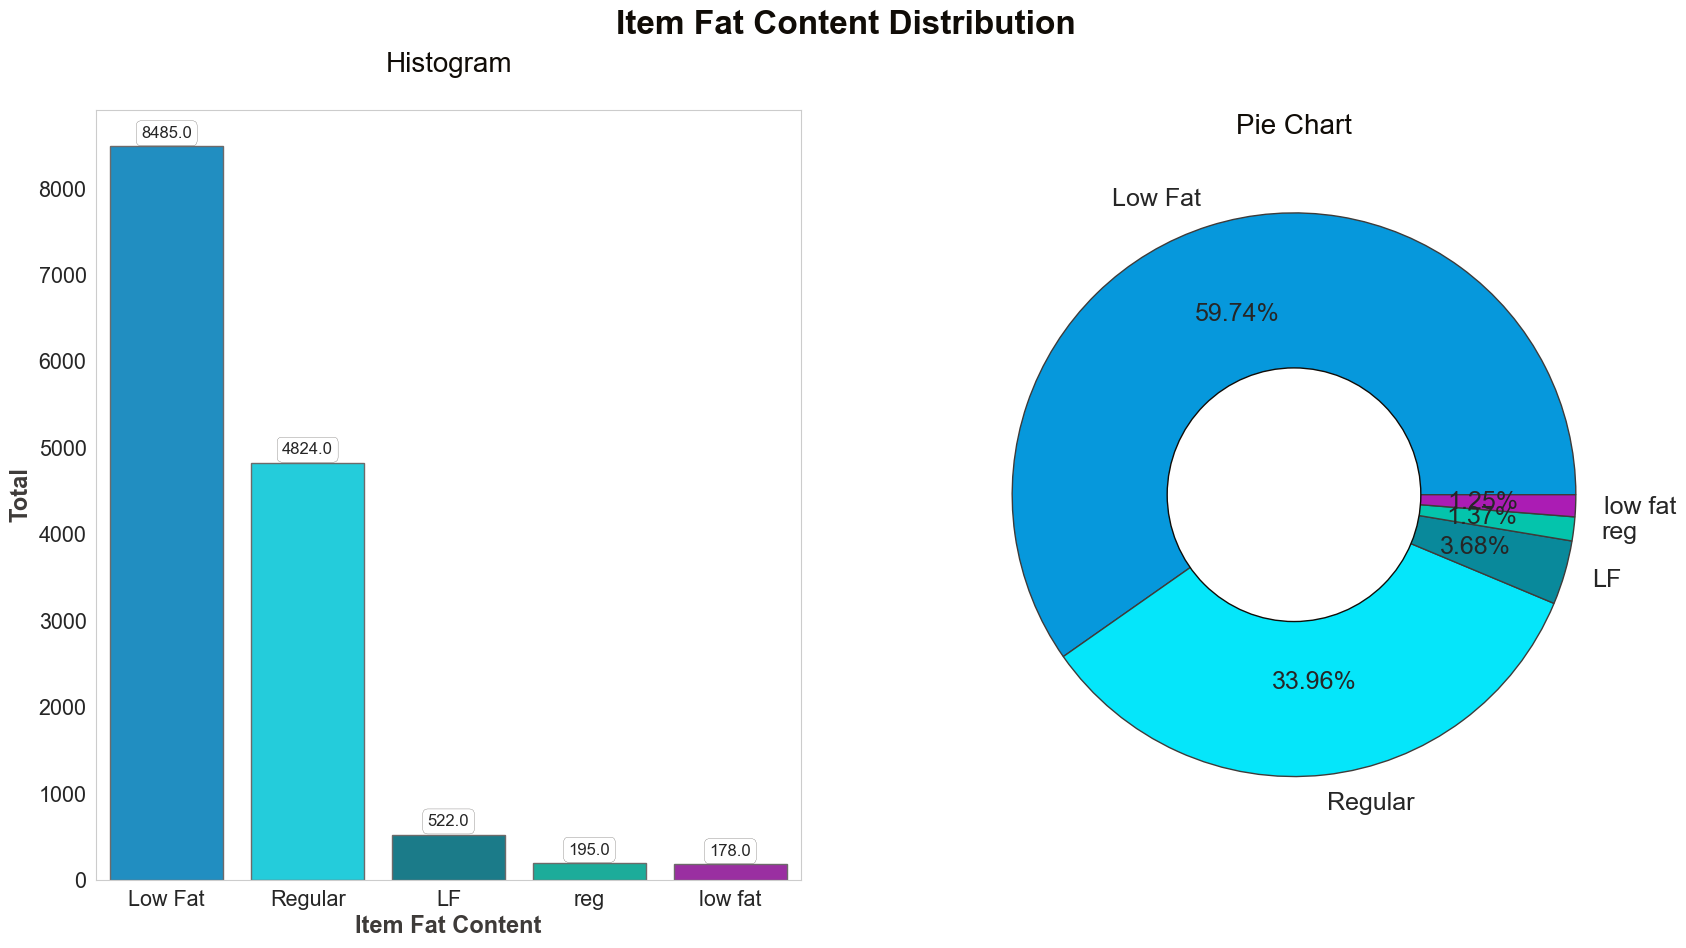

In [42]:
# --- Size for Both Figures ---
plt.figure(figsize=(20, 10))
plt.suptitle('Item Fat Content Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram\n', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Item_Fat_Content', data=dataset, palette=colors, order=order, edgecolor=black_grad[2])
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+100,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.xlabel('Item Fat Content', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
plt.pie(dataset['Item_Fat_Content'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(edgecolor=black_grad[1]), textprops={'fontsize':18})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[0])
plt.gcf().gca().add_artist(centre)

In [43]:
# --- Data Visualization for Item Fat Content of Combined Dataset ---
# --- Replacing similar values with a specific value ---
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})

colors=color_mix
labels=dataset['Item_Fat_Content'].dropna().unique()
order=dataset['Item_Fat_Content'].value_counts().index

print('.: Item Fat Content Total :.')
print('*' * 29)
dataset.Item_Fat_Content.value_counts()

.: Item Fat Content Total :.
*****************************


Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

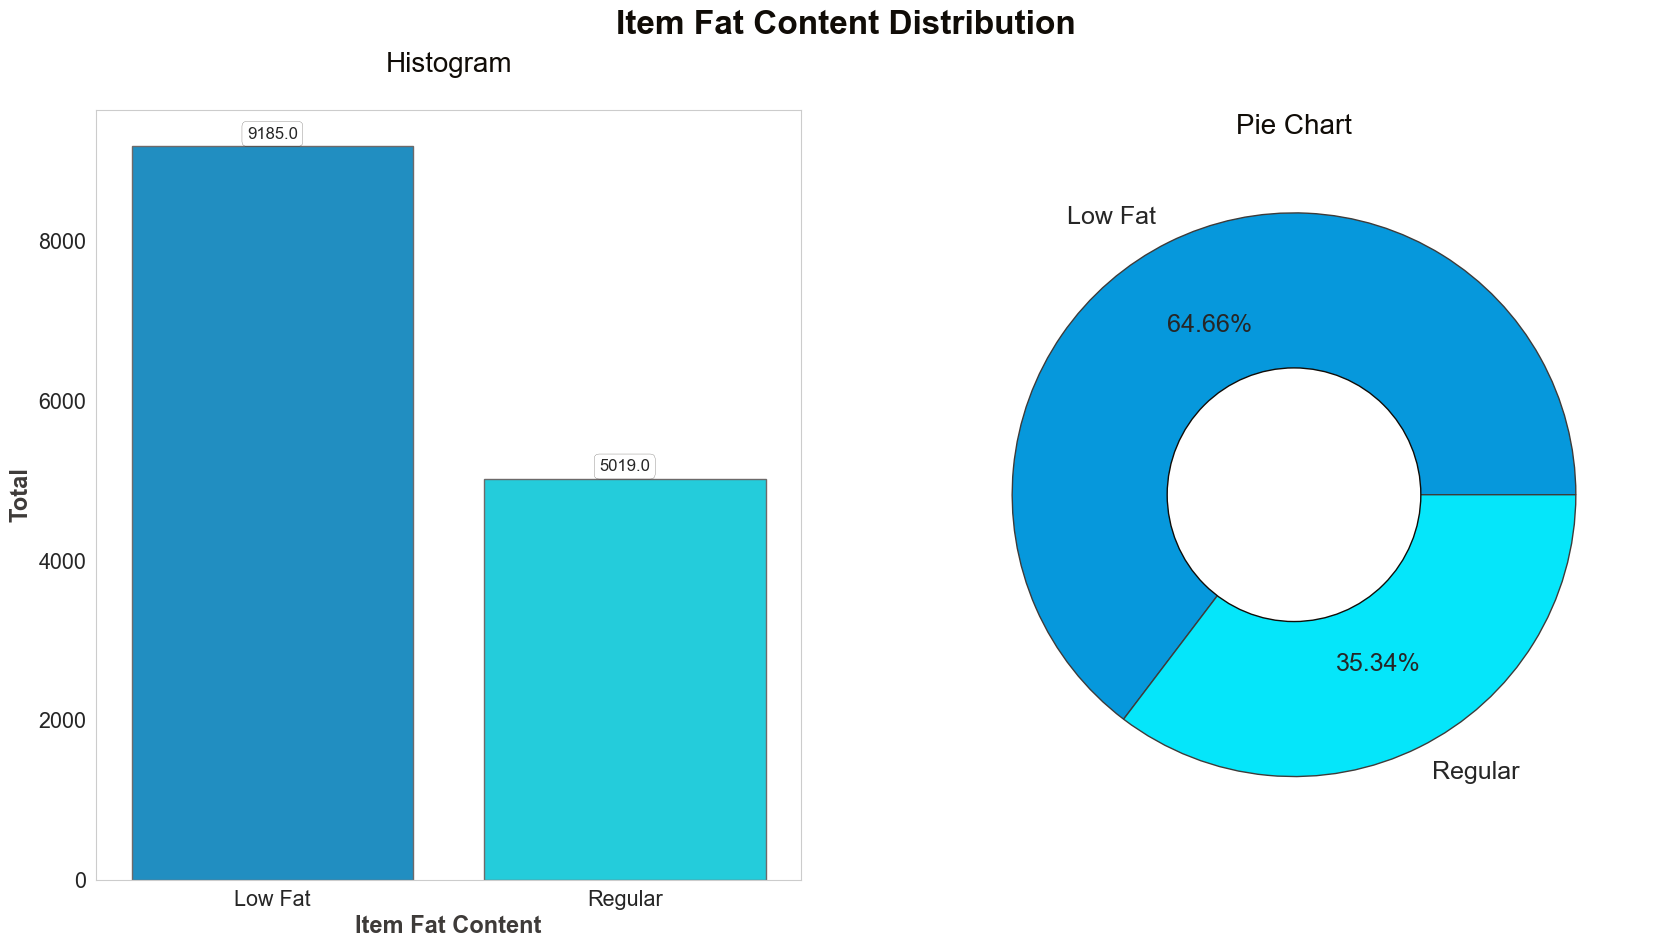

In [44]:
# --- Size for Both Figures ---
plt.figure(figsize=(20, 10))
plt.suptitle('Item Fat Content Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram\n', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Item_Fat_Content', data=dataset, palette=colors, order=order, edgecolor=black_grad[2])
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+100,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.xlabel('Item Fat Content', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=20, fontfamily='sans-serif', color=black_grad[0])
plt.pie(dataset['Item_Fat_Content'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(edgecolor=black_grad[1]), textprops={'fontsize':18})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[0])
plt.gcf().gca().add_artist(centre)

In [45]:
# --- Data Visualization for Item Types and Fat Content of Combined Dataset ---
df_type=dataset.groupby('Item_Type').sum().reset_index()
print('\n')
fig2=px.sunburst(dataset,path=['Item_Type','Item_Fat_Content'],color_continuous_scale='RdBu')
fig2.update_layout(title='Item Types and Fat Content', title_x=0.5,title_y=0.999,font_size=15, annotations=[dict(showarrow=True,height=1010,width=900)],margin=dict(l=20, r=20, t=20, b=20))
fig2.show()

In [46]:
# --- Calculating Current Total number of Years from establishment ---
dataset['Outlet_Year'] = 2023 - dataset['Outlet_Establishment_Year']
dataset.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
dataset.Outlet_Year.unique()

array([24, 14, 25, 36, 38, 21, 16, 26, 19], dtype=int64)

In [47]:
# --- Reading Combined Dataset after data processing (Adding missing values and replacling similar values) ---
dataset.head(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [48]:
# --- Calculating mean value of Item_Weight for every Unique item present in dataset ---
vmean = dataset.pivot_table(index = "Item_Identifier",  values = "Item_Visibility")
print(vmean)

                 Item_Visibility
Item_Identifier                 
DRA12                   0.034938
DRA24                   0.045646
DRA59                   0.133384
DRB01                   0.079736
DRB13                   0.006799
...                          ...
NCZ30                   0.027302
NCZ41                   0.056396
NCZ42                   0.011015
NCZ53                   0.026330
NCZ54                   0.081345

[1559 rows x 1 columns]


In [49]:
# --- Updating the zero visibility item values of dataset with mean values ---
dataset.loc[(dataset["Item_Visibility"] == 0.0), "Item_Visibility"] = dataset.loc[(dataset["Item_Visibility"] == 0.0), "Item_Identifier"].apply(lambda x : vmean.at[x, "Item_Visibility"])

In [50]:
# --- Saving the updated combined dataset to new file ---
dataset.to_csv('insight.csv')

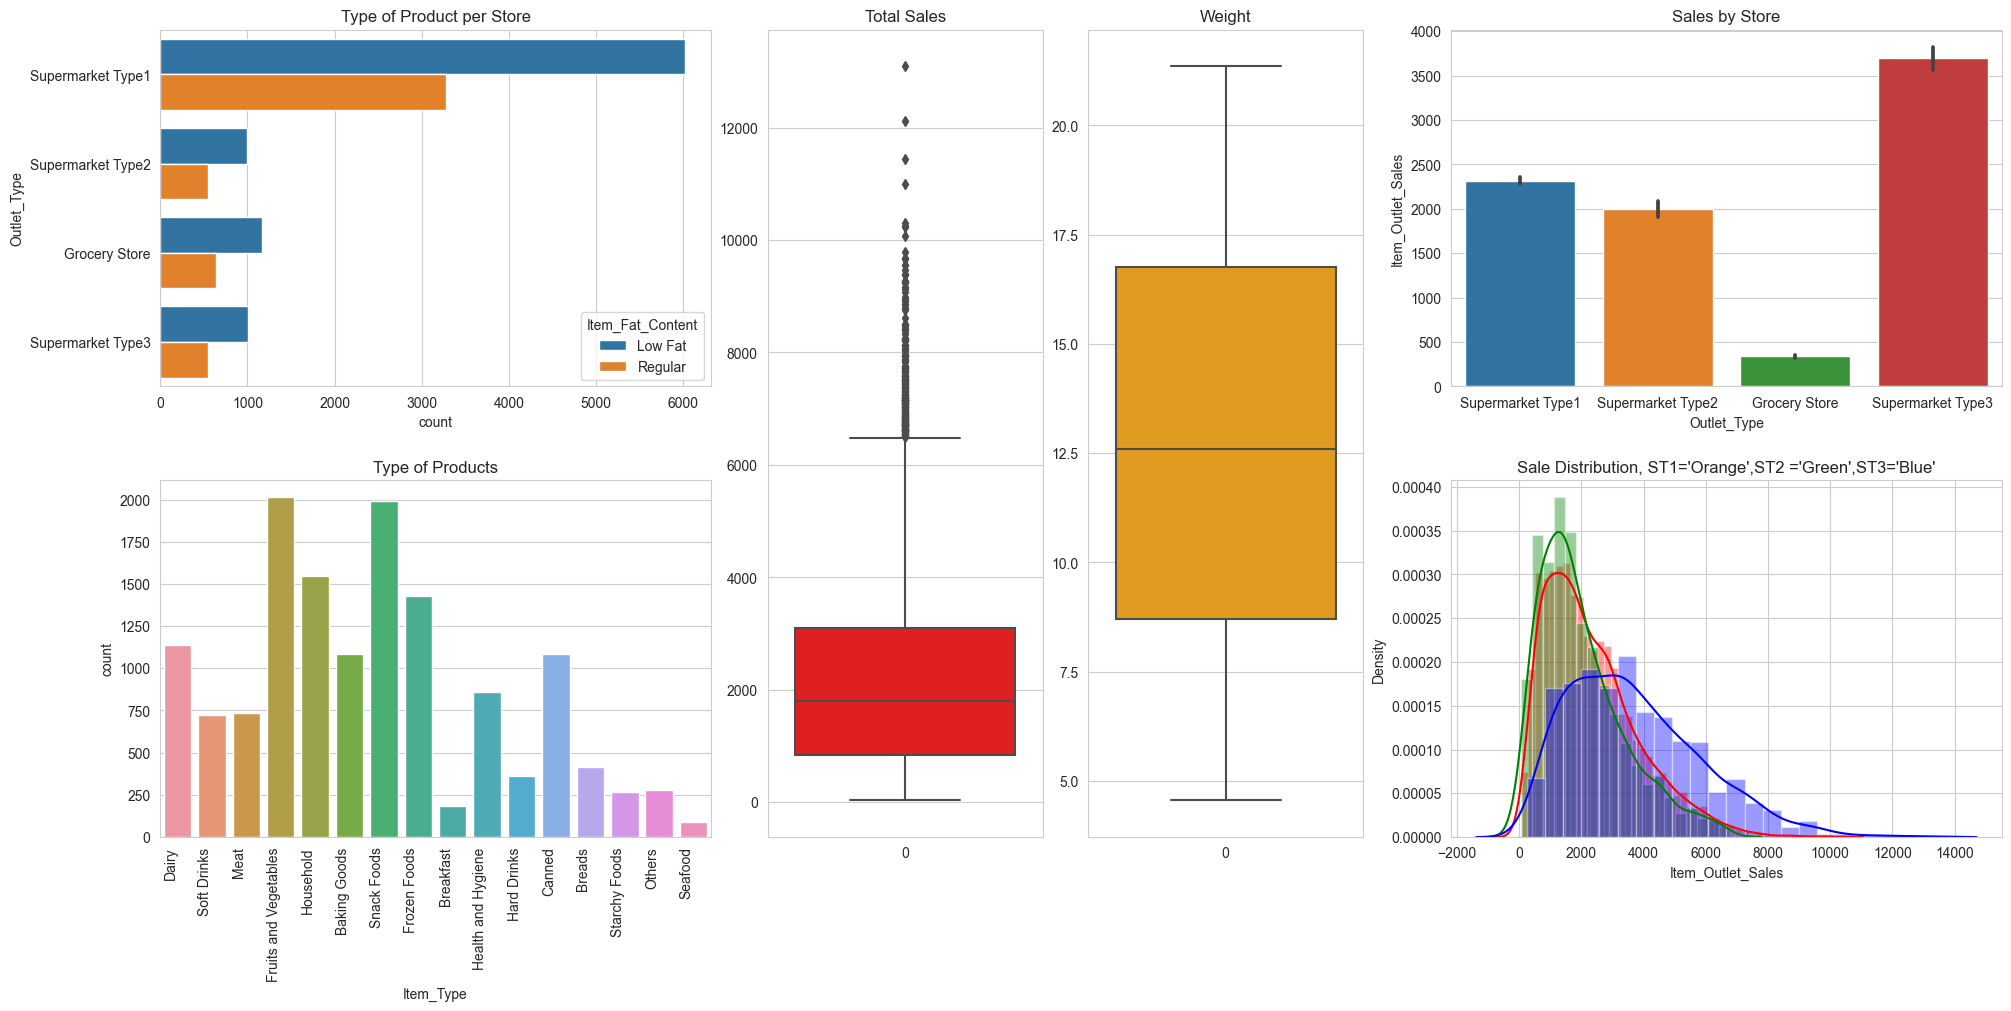

In [51]:
# --- Creating Dashboard of completly processed dataset ---
fig = plt.figure(constrained_layout=True, figsize=(20,10))
grid = gridspec.GridSpec(ncols=6, nrows=2, figure=fig)

# --- bar plot Horizontal ---
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Type of Product per Store')
sns.countplot(y='Outlet_Type',hue = 'Item_Fat_Content',data = dataset, ax=ax1) #Outlet Type

# --- bar plot Vertical ---
ax2 = fig.add_subplot(grid[1, :2])
ax2.set_title('Type of Products')
bar = sns.countplot(x='Item_Type', data = dataset, ax = ax2)
bar.set_xticklabels(bar.get_xticklabels(),  rotation=90, horizontalalignment='right') #Type of Products

# --- box plot Sales ---
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Total Sales')
sns.boxplot(train.loc[:,'Item_Outlet_Sales'], orient='v', ax = ax3, color = 'Red') #Total Sales

# --- box plot Monthly payment ---
ax4 = fig.add_subplot(grid[:,3])
ax4.set_title("Weight")
sns.boxplot(dataset['Item_Weight'], orient='v' ,ax=ax4, color = 'Orange')


# --- Displot Distribution ---
ax5 = fig.add_subplot(grid[0, 4:6])
ax5.set_title("Sales by Store")
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales',data=dataset,ax=ax5) 


# --- Displot Distribution ---
ax6 = fig.add_subplot(grid[1, 4:6])
ax6.set_title("Sale Distribution, ST1='Orange',ST2 ='Green',ST3='Blue'")
SuperT1 = dataset[dataset['Outlet_Type']=='Supermarket Type1']
SuperT2 = dataset[dataset['Outlet_Type']=='Supermarket Type2']
SuperT3 = dataset[dataset['Outlet_Type']=='Supermarket Type3']
Grocery = dataset[dataset['Outlet_Type']=='Grocery Store']

sns.distplot(SuperT1['Item_Outlet_Sales'], color = 'Red', ax=ax6)
sns.distplot(SuperT2['Item_Outlet_Sales'], color = 'Green', ax=ax6)
sns.distplot(SuperT3['Item_Outlet_Sales'], color = 'Blue', ax=ax6)

plt.show()

In [52]:
# --- Turning all categorical variables into numerical values can be done by mapping each categorical value with respective FREQUENCY of the values in the column ---
cat_var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Item_Identifier','Outlet_Identifier']
for i in cat_var:
    p  = dataset[i].value_counts().to_dict()
    dataset[i] = dataset[i].map(p)

In [53]:
# --- Reading Combined Dataset after data processing ---
dataset.head(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [54]:
# --- Reading Combined Dataset after data processing ---
dataset.tail(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [55]:
# --- Dividing dataset into testing and training dataset ---
train = dataset.loc[dataset['source']=="Train"]
test = dataset.loc[dataset['source']=="Test"]

# --- Drop unnecessary columns ---
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [56]:
# --- Reading the divided training dataset ---
train.head(10).style.background_gradient(cmap='YlOrRd').set_properties(**{'border': '1px solid black'})

In [57]:
# --- Reading the divided testing dataset ---
test.head(10).style.background_gradient(cmap='summer').set_properties(**{'border': '1px solid black'})

In [58]:
# --- Finding corelation between the columns of training dataset ---
corr_matrix=train.corr()
corr_matrix['Item_Outlet_Sales']

Item_Identifier        -0.073375
Item_Weight             0.013261
Item_Fat_Content       -0.018719
Item_Visibility        -0.128453
Item_Type               0.038123
Item_MRP                0.567574
Outlet_Identifier       0.415482
Outlet_Size            -0.165968
Outlet_Location_Type    0.082256
Outlet_Type             0.100742
Item_Outlet_Sales       1.000000
Outlet_Year             0.049135
Name: Item_Outlet_Sales, dtype: float64

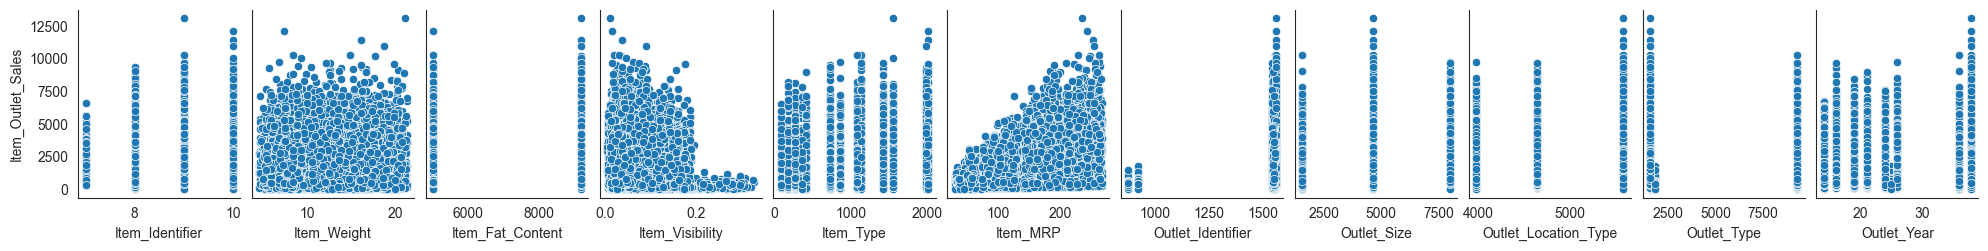

In [59]:
# --- Ploting multiple bivariate pairwise columns of training dataset ---
sns.set_style('white')
p=sns.pairplot(data=train,y_vars=['Item_Outlet_Sales'],x_vars=['Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP','Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Year'])
p.fig.set_figwidth(20)

<Axes: >

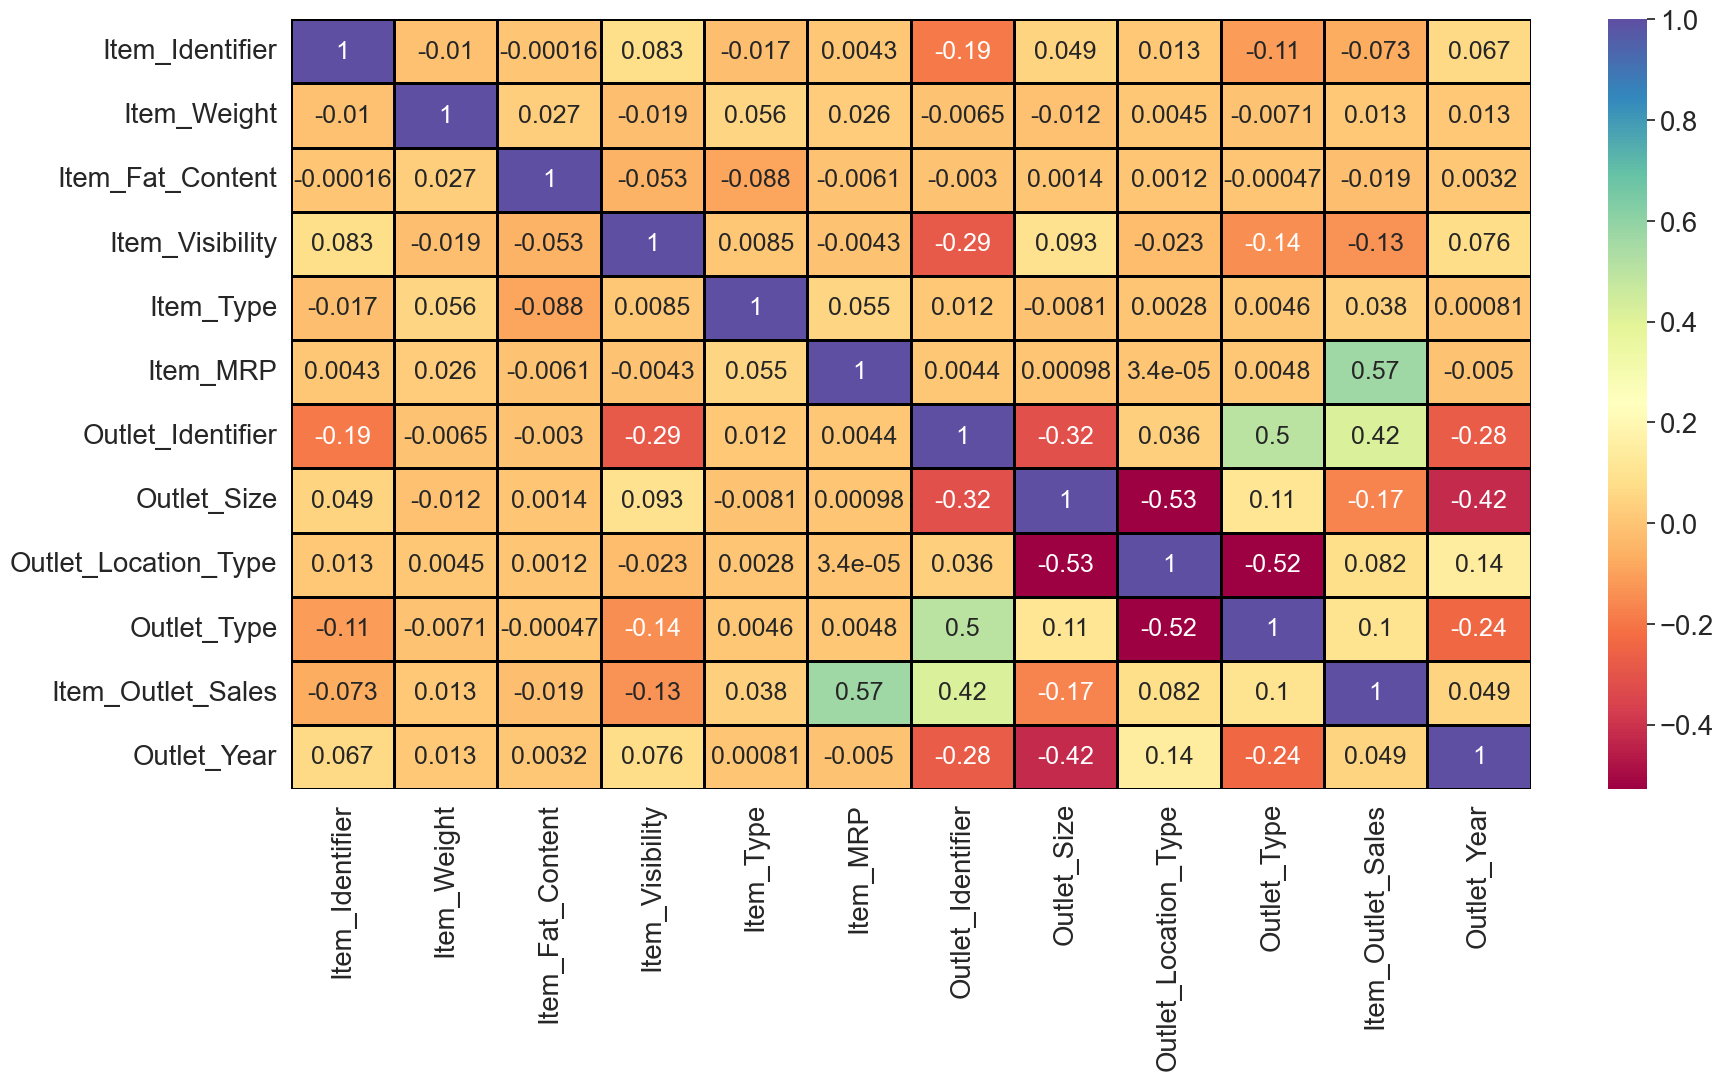

In [60]:
# --- Ploting heat map based on Correlation Values ---
plt.figure(figsize = (20,10))
sns.set(font_scale=1.8)
sns.heatmap(corr_matrix, cmap = "Spectral", annot = True,annot_kws={"size": 18},linewidths=2, linecolor="black")

In [61]:
# --- Removing Unnecessary and Less Corelated data from the dataset ---
train= train.drop(['Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type'],axis=1)

In [62]:
# --- Finding Skewness ---
train.skew()

Item_Visibility      1.224502
Item_MRP             0.127202
Outlet_Identifier   -2.244440
Outlet_Size         -0.803252
Outlet_Type         -0.650419
Item_Outlet_Sales    1.177531
Outlet_Year          0.396641
dtype: float64

<Axes: xlabel='Outlet_Year', ylabel='Density'>

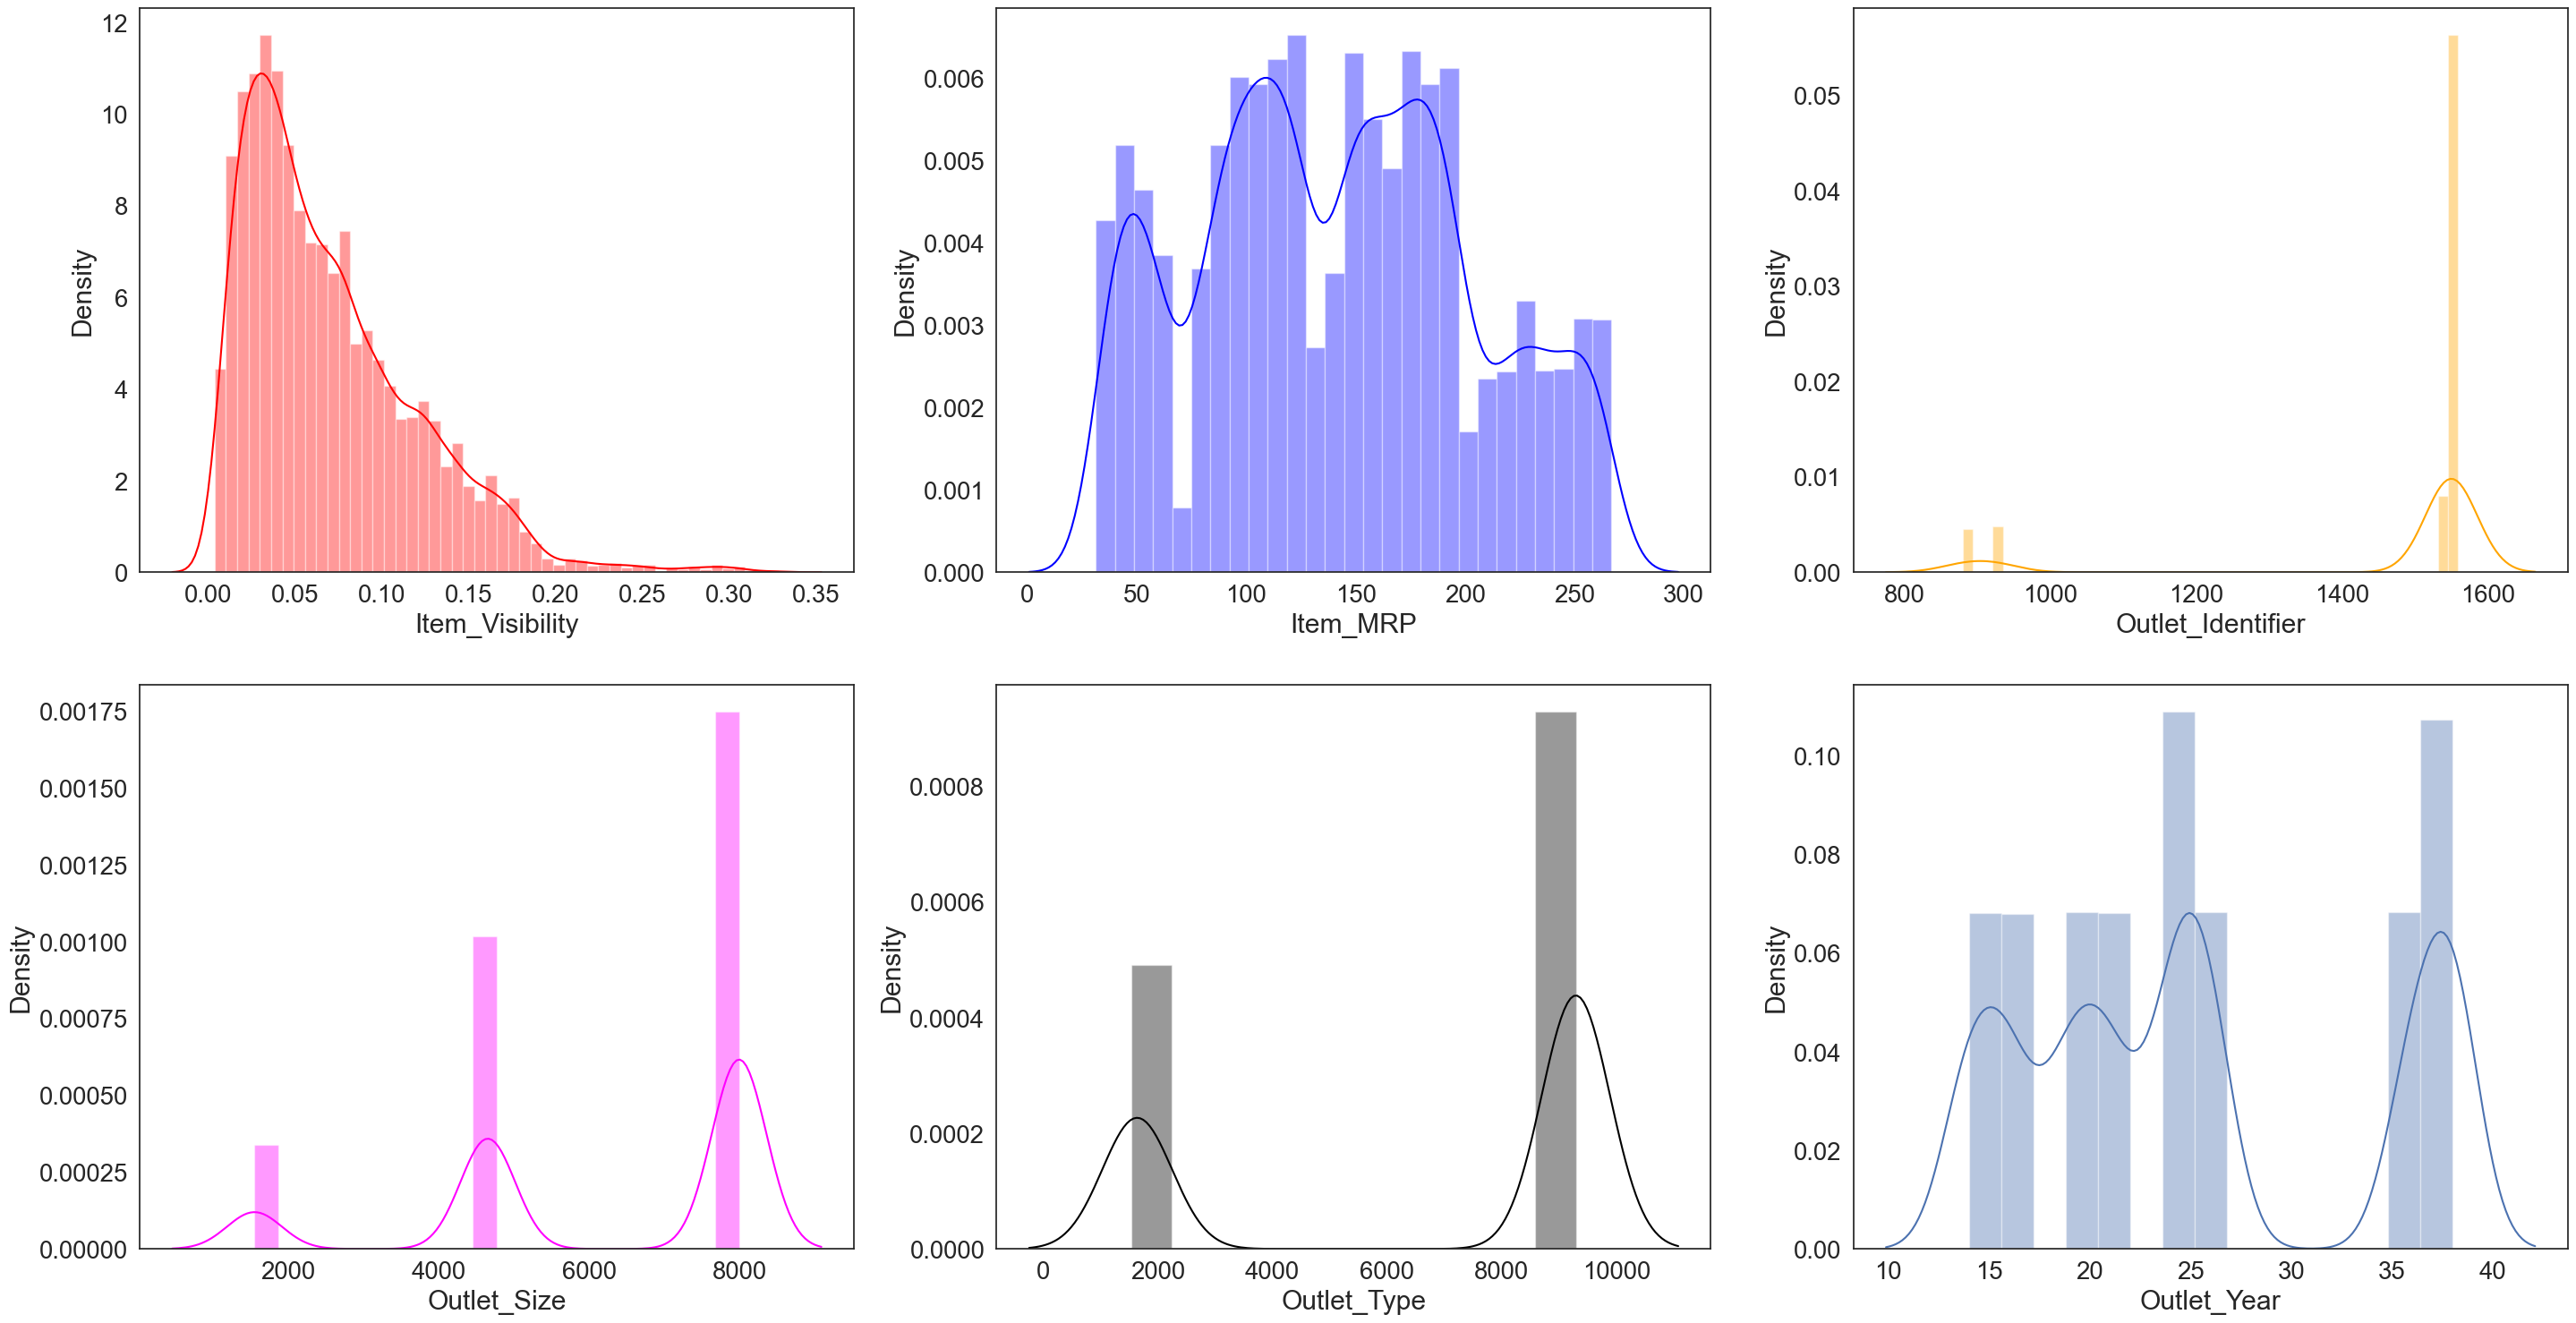

In [63]:
sns.set_style('white')
# --- Before Scaling ---
fig, ax = plt.subplots(2,3,figsize = (35,18))
sns.distplot(train["Item_Visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(train["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(train["Outlet_Identifier"], kde =True, ax=ax[0,2], color = "orange")
sns.distplot(train["Outlet_Size"], kde =True, ax=ax[1,0], color = "magenta")
sns.distplot(train["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(train["Outlet_Year"], kde =True, ax=ax[1,2])

In [64]:
# --- Normalizing Dataset Values ---
for i in train.columns:
    train[i] =np.log(train[i])

In [65]:
# --- Reading Dataset ---
train.head(10).style.background_gradient(cmap='YlOrRd').set_properties(**{'border': '1px solid black'})

<Axes: xlabel='Outlet_Year', ylabel='Density'>

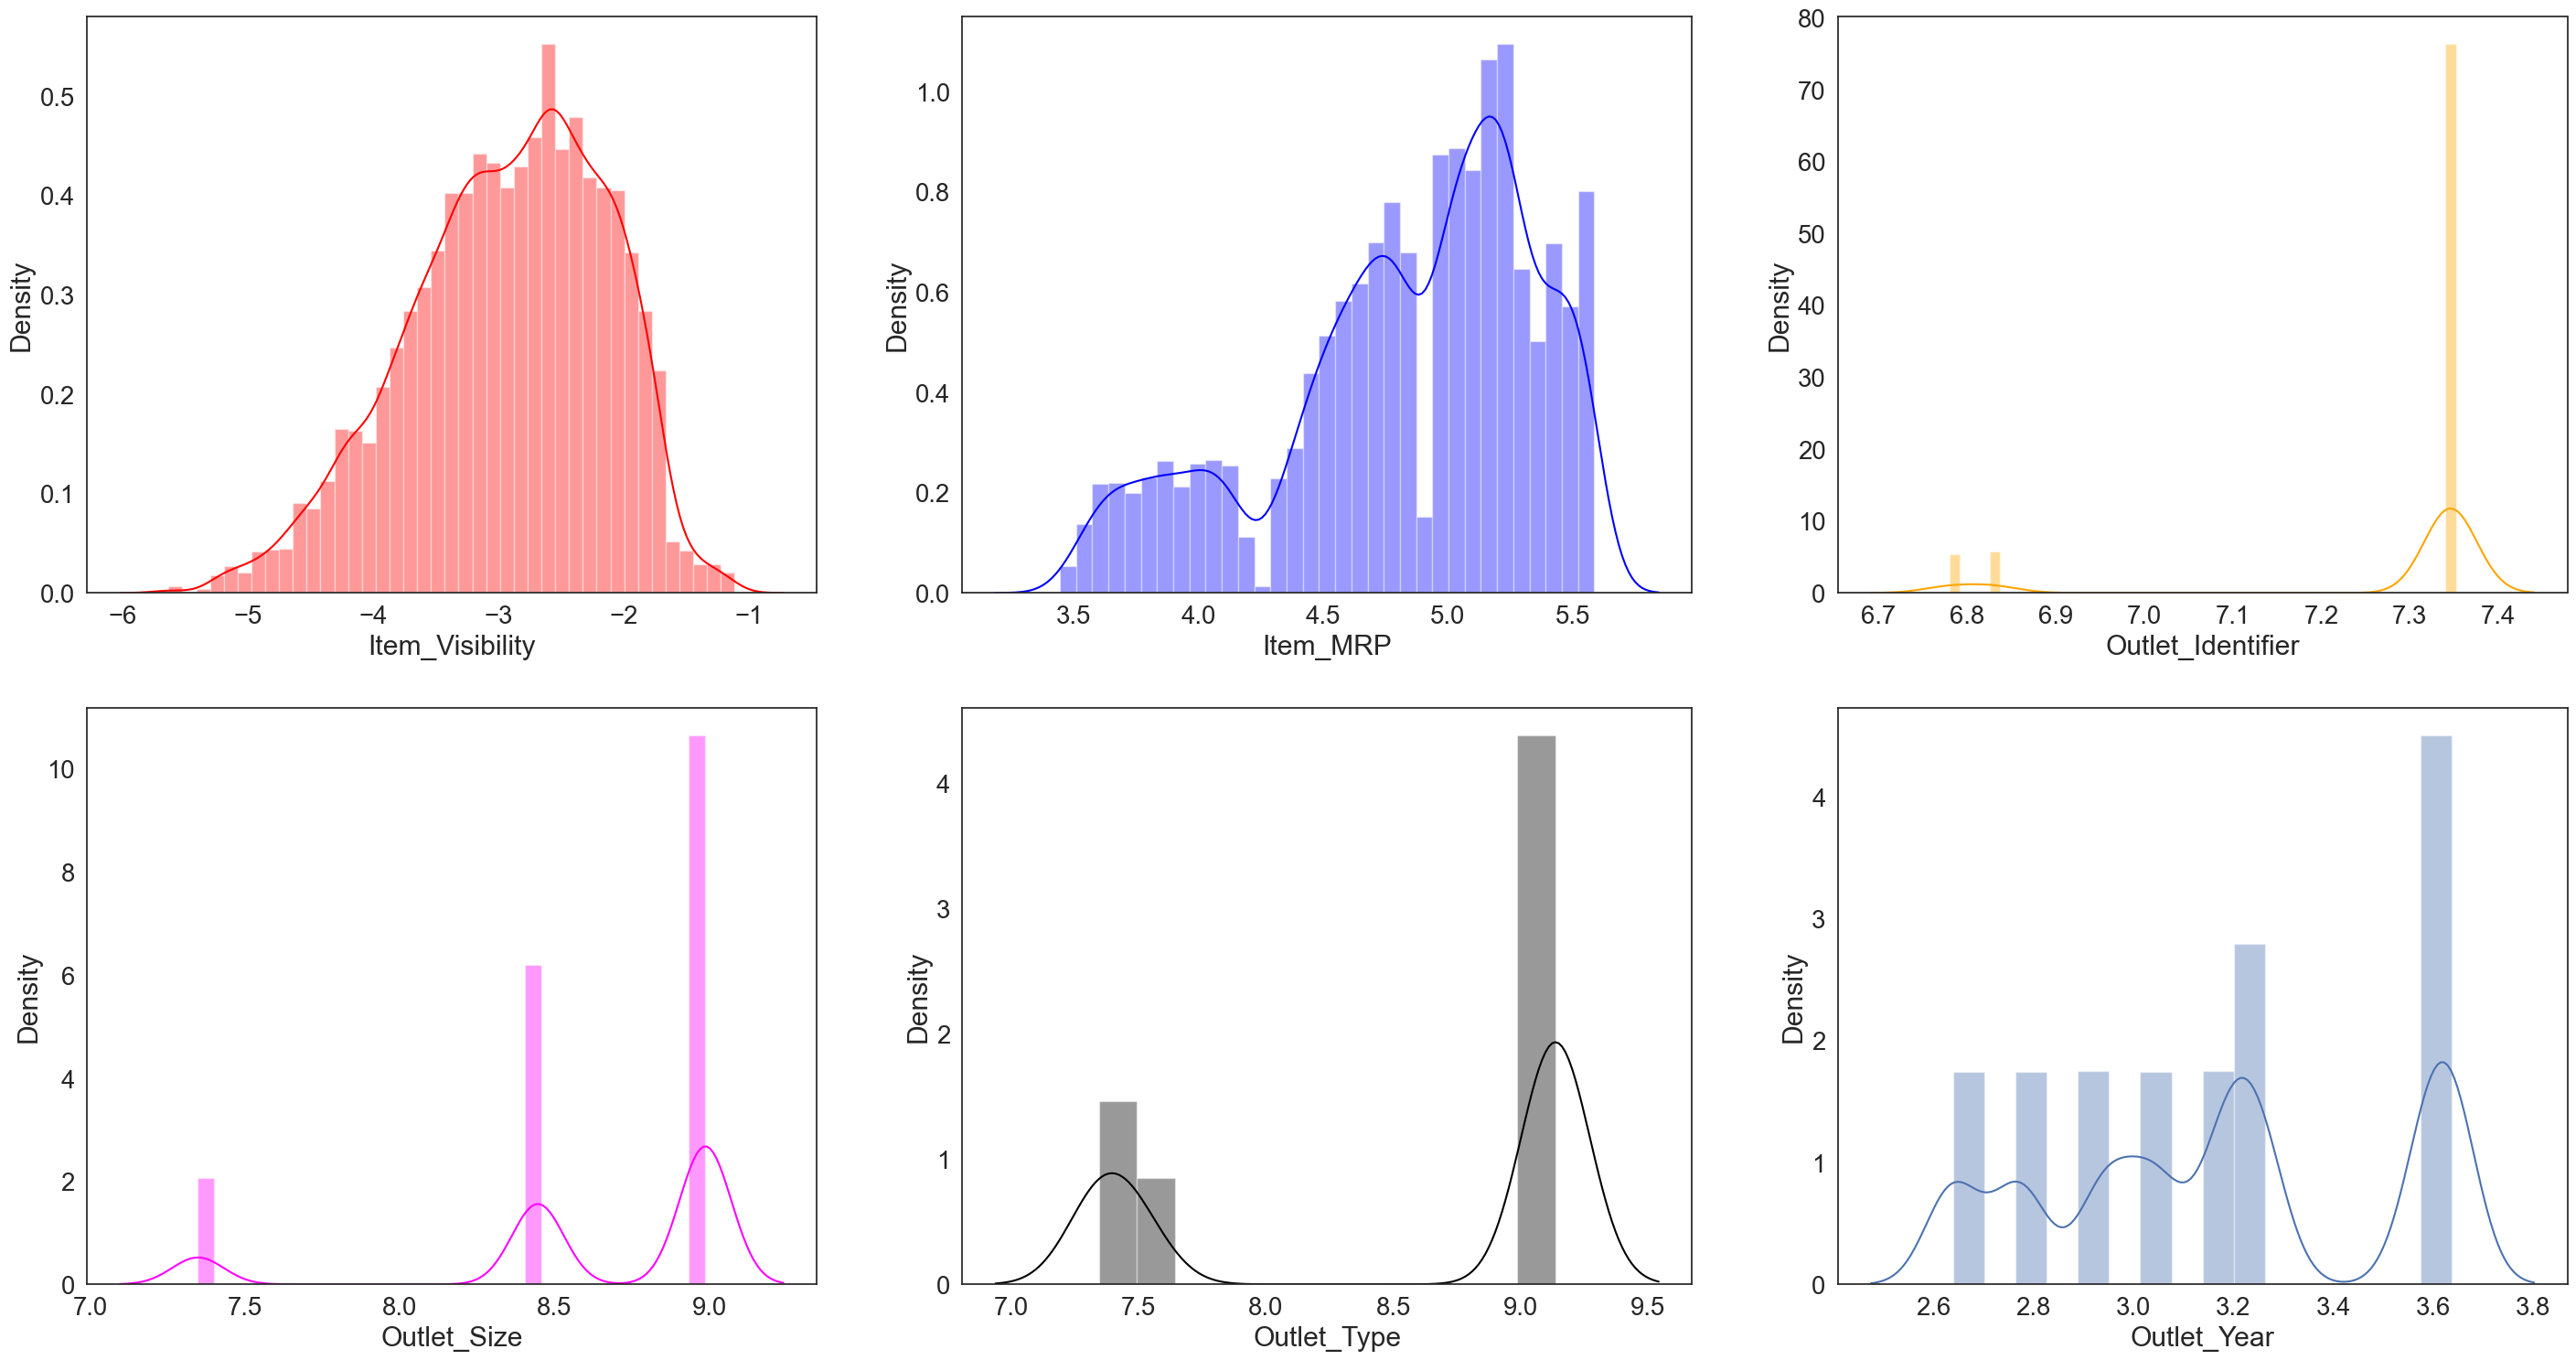

In [66]:
# --- After Scaling the variables ---
fig, ax = plt.subplots(2,3,figsize = (35,18))
sns.distplot(train["Item_Visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(train["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(train["Outlet_Identifier"], kde =True, ax=ax[0,2], color = "orange")
sns.distplot(train["Outlet_Size"], kde =True, ax=ax[1,0], color = "magenta")
sns.distplot(train["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(train["Outlet_Year"], kde =True, ax=ax[1,2])

In [67]:
# --- Defining Target and Predictor Variable ---
y=train["Item_Outlet_Sales"]
x= train.drop(["Item_Outlet_Sales"],axis=1)
x.head(10).style.background_gradient(cmap='YlOrRd').set_properties(**{'border': '1px solid black'})

In [68]:
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [70]:
# --- Fitting Linear Regression ---
reg = LinearRegression()
reg = reg.fit(x_train,y_train)

In [71]:
reg.coef_

array([-1.35516130e-03,  1.01609492e+00,  4.34936806e+00,  2.06613056e-01,
       -1.10626996e-01,  4.94382445e-01])

In [72]:
reg.intercept_

-31.66585083798205

In [73]:
# --- Prediction of Linear Regression ---
y_pred = reg.predict(x_test)

# --- RMSE ---
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',rmse )

# --- Accuracy Score Check ---
r2_score = r2_score(y_test, y_pred)
print('R2_Score:',r2_score*100,"%" )

Root Mean Squared Error: 0.5374684581806022
R2_Score: 72.96248381320221 %


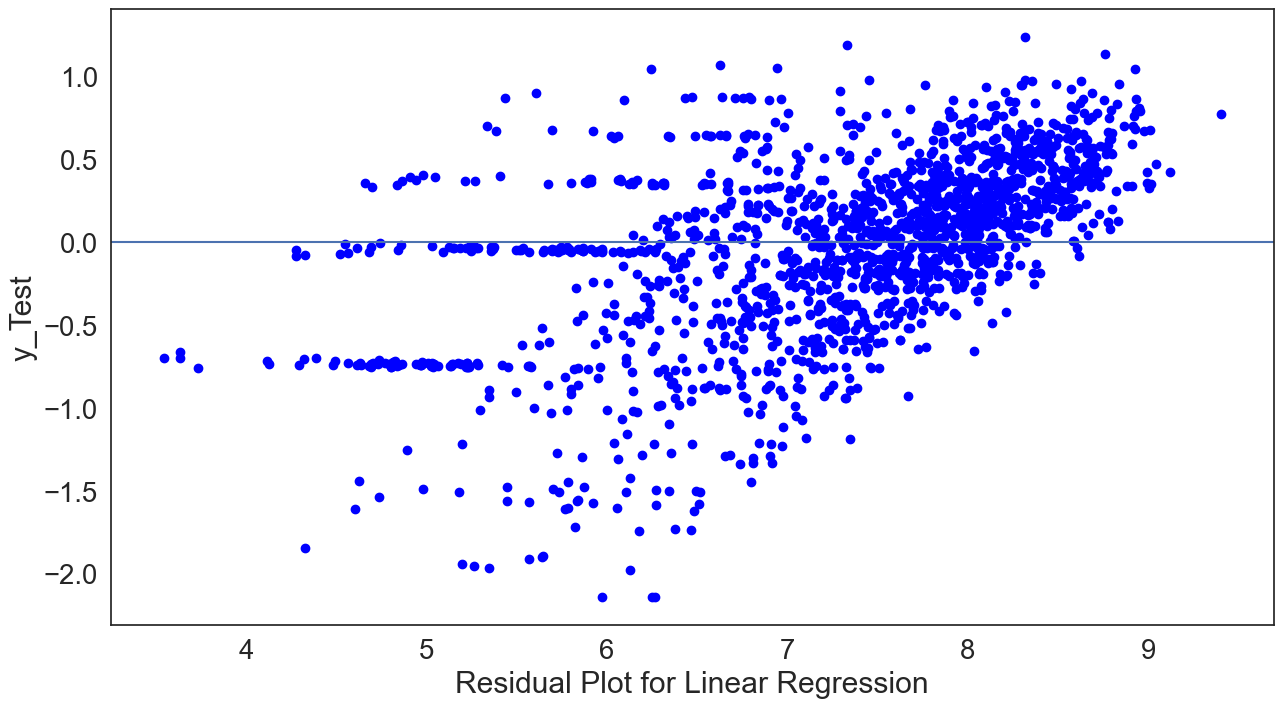

In [74]:
# --- RESIDUE VALUE OF LINEAR REGRESSION ---
residue_lreg = y_test - y_pred

# --- Plotting Residual Plot ---
plt.figure(figsize=(15, 8))
plt.scatter(y_test,residue_lreg, c = "blue")
plt.xlabel("Residual Plot for Linear Regression")
plt.ylabel("y_Test")
plt.axhline(y = 0)

<Axes: title={'center': 'Linear'}>

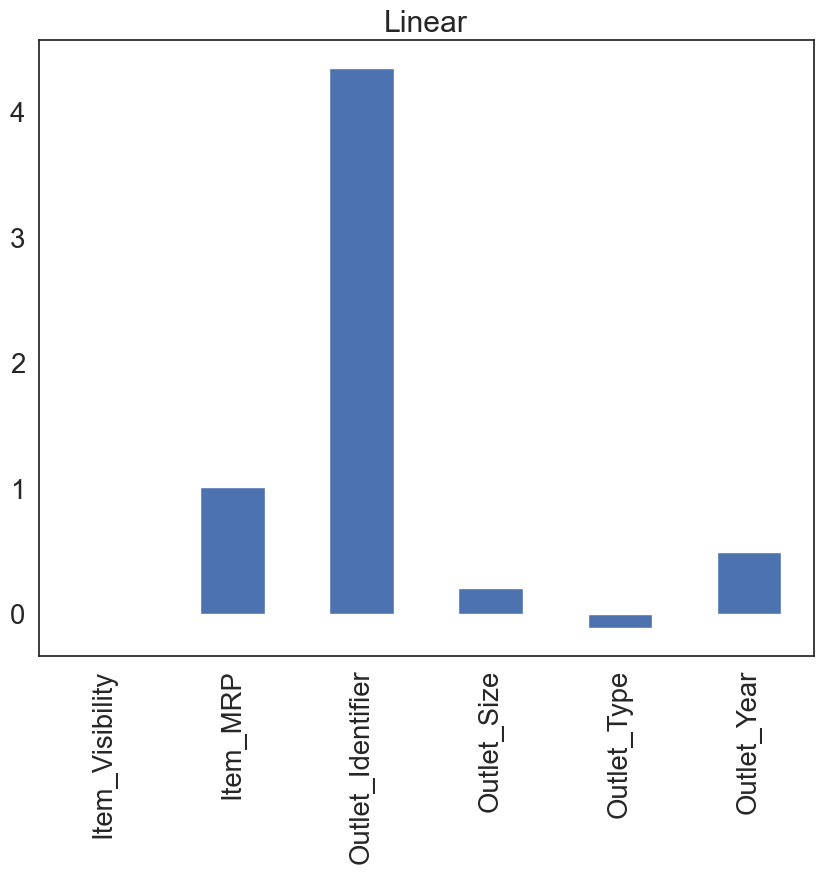

In [75]:
# --- Linear Regression ---
plt.figure(figsize=(10, 8))
Lreg_coef = pd.Series(reg.coef_,index =x.columns)
Lreg_coef.plot(kind="bar", title= "Linear")

In [76]:
from sklearn.linear_model import Lasso, Ridge

# --- Fitting Lasso Regression ---
ls = Lasso(alpha = 0.009)
ls = ls.fit(x_train, y_train)

In [77]:
ls.coef_

array([-0.        ,  0.98490925,  3.63249809,  0.02916615, -0.03949171,
        0.21741931])

In [78]:
ls.intercept_

-24.49194908310222

In [79]:
# --- Prediction of Lasso Regression ---
ls_pred = ls.predict(x_test)

# --- RSME ---
rmse_LS = np.sqrt(metrics.mean_squared_error(y_test, ls_pred))
print('Root Mean Squared Error:',rmse_LS )

# --- Accuracy Score Check ---
from sklearn.metrics import r2_score
r2_score_LS = r2_score(y_test, ls_pred)
print('R2_Score:',r2_score_LS*100,"%" )

Root Mean Squared Error: 0.5524229989252929
R2_Score: 71.43696644494459 %


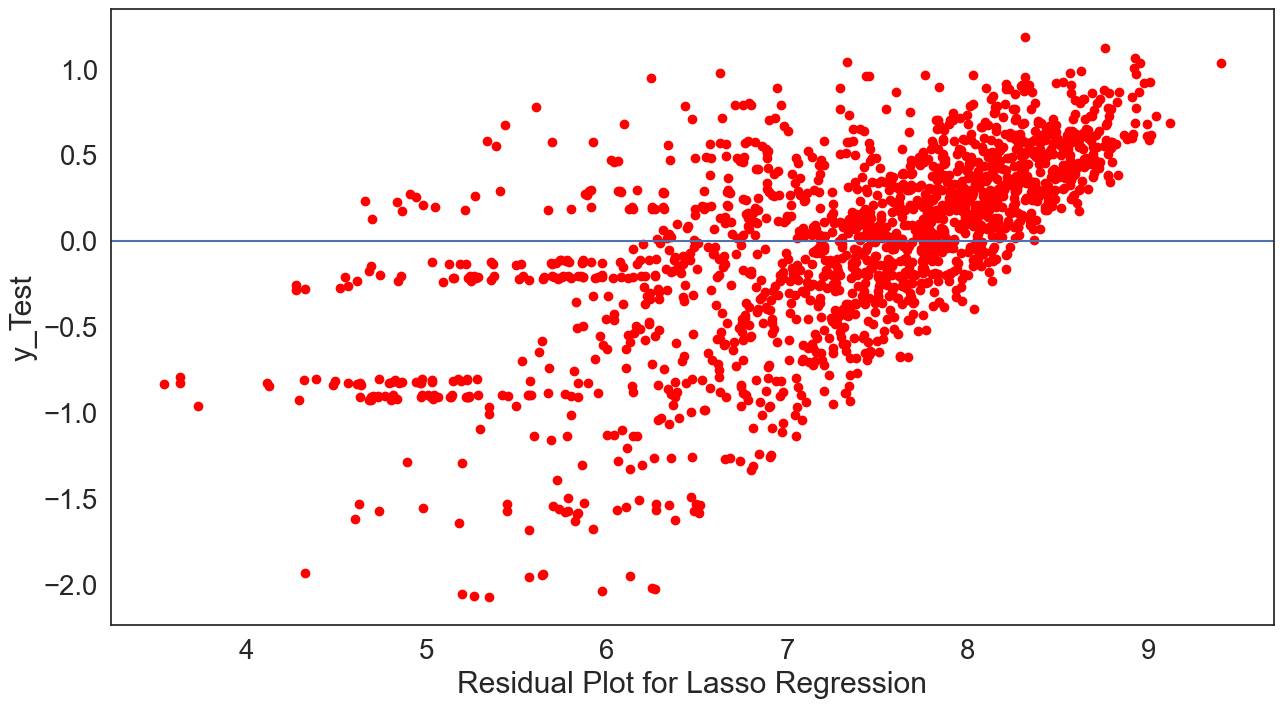

In [80]:
# --- RESIDUE VALUE OF LASSO REGRESSION ---
residue_lasso = y_test - ls_pred

# --- Plotting Residual Plot ---
plt.figure(figsize=(15, 8))
plt.scatter(y_test,residue_lasso, c = "red")
plt.xlabel("Residual Plot for Lasso Regression")
plt.ylabel("y_Test")
plt.axhline(y = 0)

<Axes: title={'center': 'Lasso'}>

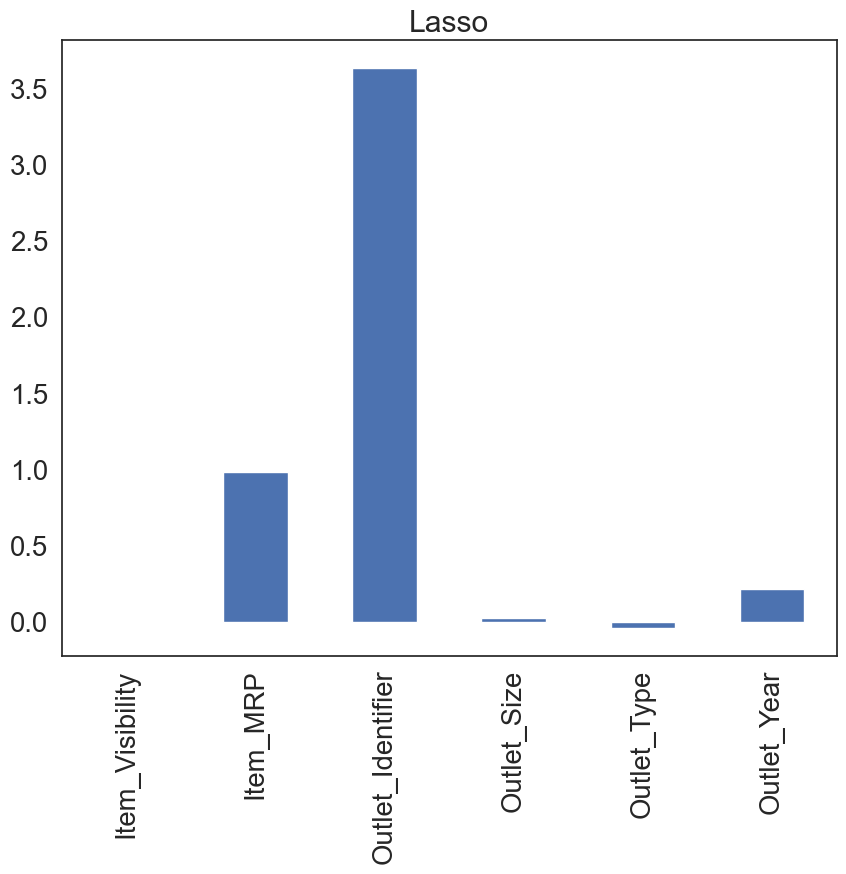

In [81]:
# --- Lasso Regression ---
plt.figure(figsize=(10, 8))
lasso_coef = pd.Series(ls.coef_,index =x.columns)
lasso_coef.plot(kind="bar", title= "Lasso")

In [82]:
# --- Fitting Ridge Regression ---
rr = Ridge(alpha = 0.009)
rr.fit(x_train, y_train)

Ridge(alpha=0.009)

In [83]:
# --- Prediction of Ridge regression ---
rr_pred = rr.predict(x_test)

# --- RMSE ---
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, rr_pred))
print('Root Mean Squared Error:',rmse_ridge)

# --- Accuracy score check ---
r2_score_RR = r2_score(y_test, y_pred)
print('R2_Score:',r2_score_RR*100,"%" )

Root Mean Squared Error: 0.537469961109218
R2_Score: 72.96248381320221 %


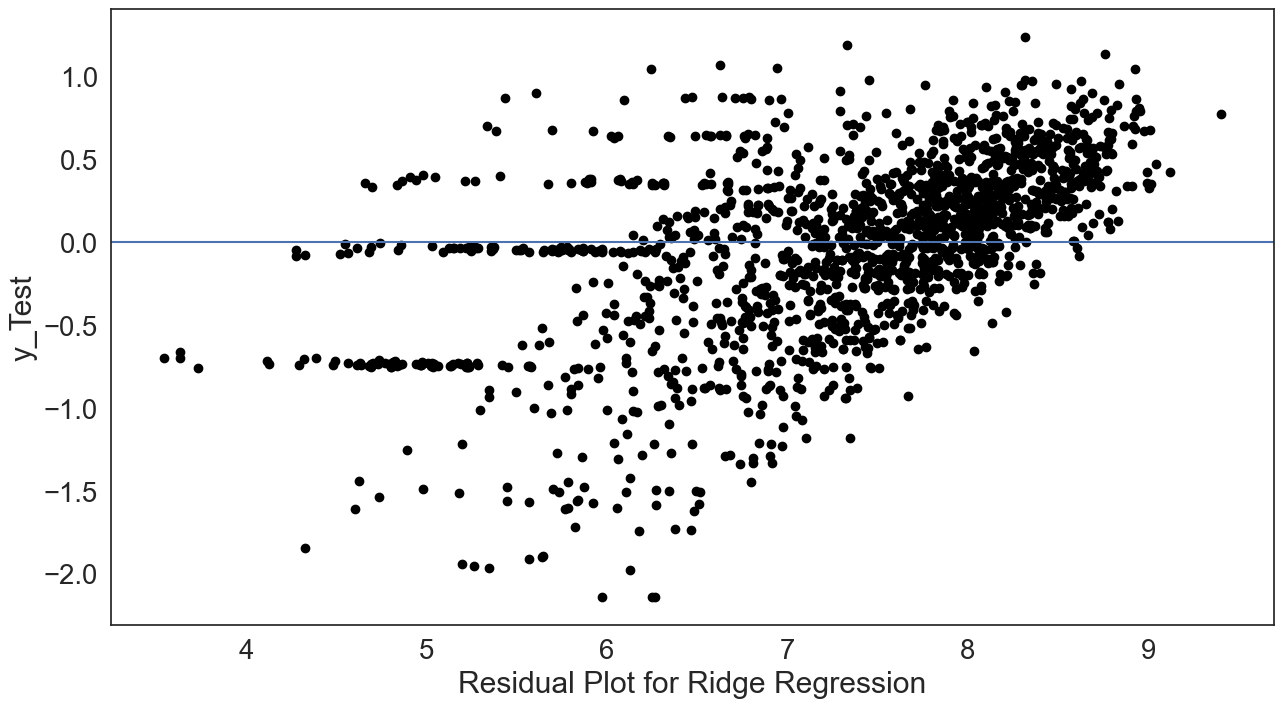

In [84]:
# --- RESIDUE VALUE OF RIDGE REGRESSION ---
residue_rr = y_test-rr_pred

# --- Plotting Residual Plot ---
plt.figure(figsize=(15, 8))
plt.scatter(y_test,residue_rr, c = "black")
plt.xlabel("Residual Plot for Ridge Regression")
plt.ylabel("y_Test")
plt.axhline(y = 0)

<Axes: title={'center': 'Ridge'}>

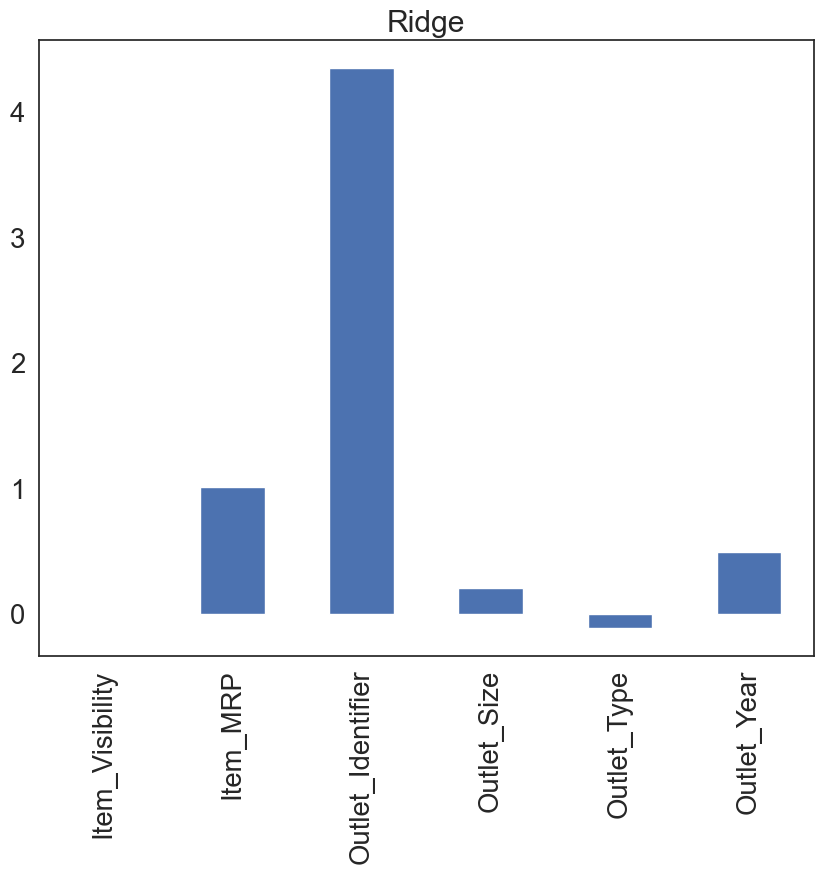

In [85]:
# --- Ridge Regression ---
plt.figure(figsize=(10, 8))
ridge_coef = pd.Series(rr.coef_,index =x.columns)
ridge_coef.plot(kind="bar", title= "Ridge",position=0.5)

In [89]:
df1 = pd.DataFrame(columns=["Linear Regression", "Ridge Regression","Lasso Regression"])
for i in range(len(rr.coef_)):
    df1=df1.append({"Linear Regression":reg.coef_[i],"Ridge Regression":rr.coef_[i], "Lasso Regression":ls.coef_[i]}, ignore_index = True)
df1

AttributeError: 'DataFrame' object has no attribute 'append'

In [87]:
test.head(10).style.background_gradient(cmap='summer').set_properties(**{'border': '1px solid black'})

In [83]:
test= test.drop(["Item_Outlet_Sales"],axis=1)
test_= test.drop(['Item_Identifier','Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type'],axis=1)

In [84]:
test_.head(10).style.set_properties(**{'border': '1px solid black'})

In [85]:
# --- Normalizing the Test dataset for prediction
test_.skew()

Item_Visibility      1.307908
Item_MRP             0.136182
Outlet_Identifier   -2.244334
Outlet_Size         -0.803264
Outlet_Type         -0.650193
Outlet_Year          0.396306
dtype: float64

In [86]:
for i in test_.columns:
    test_[i] =np.log(test_[i])

<AxesSubplot:xlabel='Outlet_Year', ylabel='Density'>

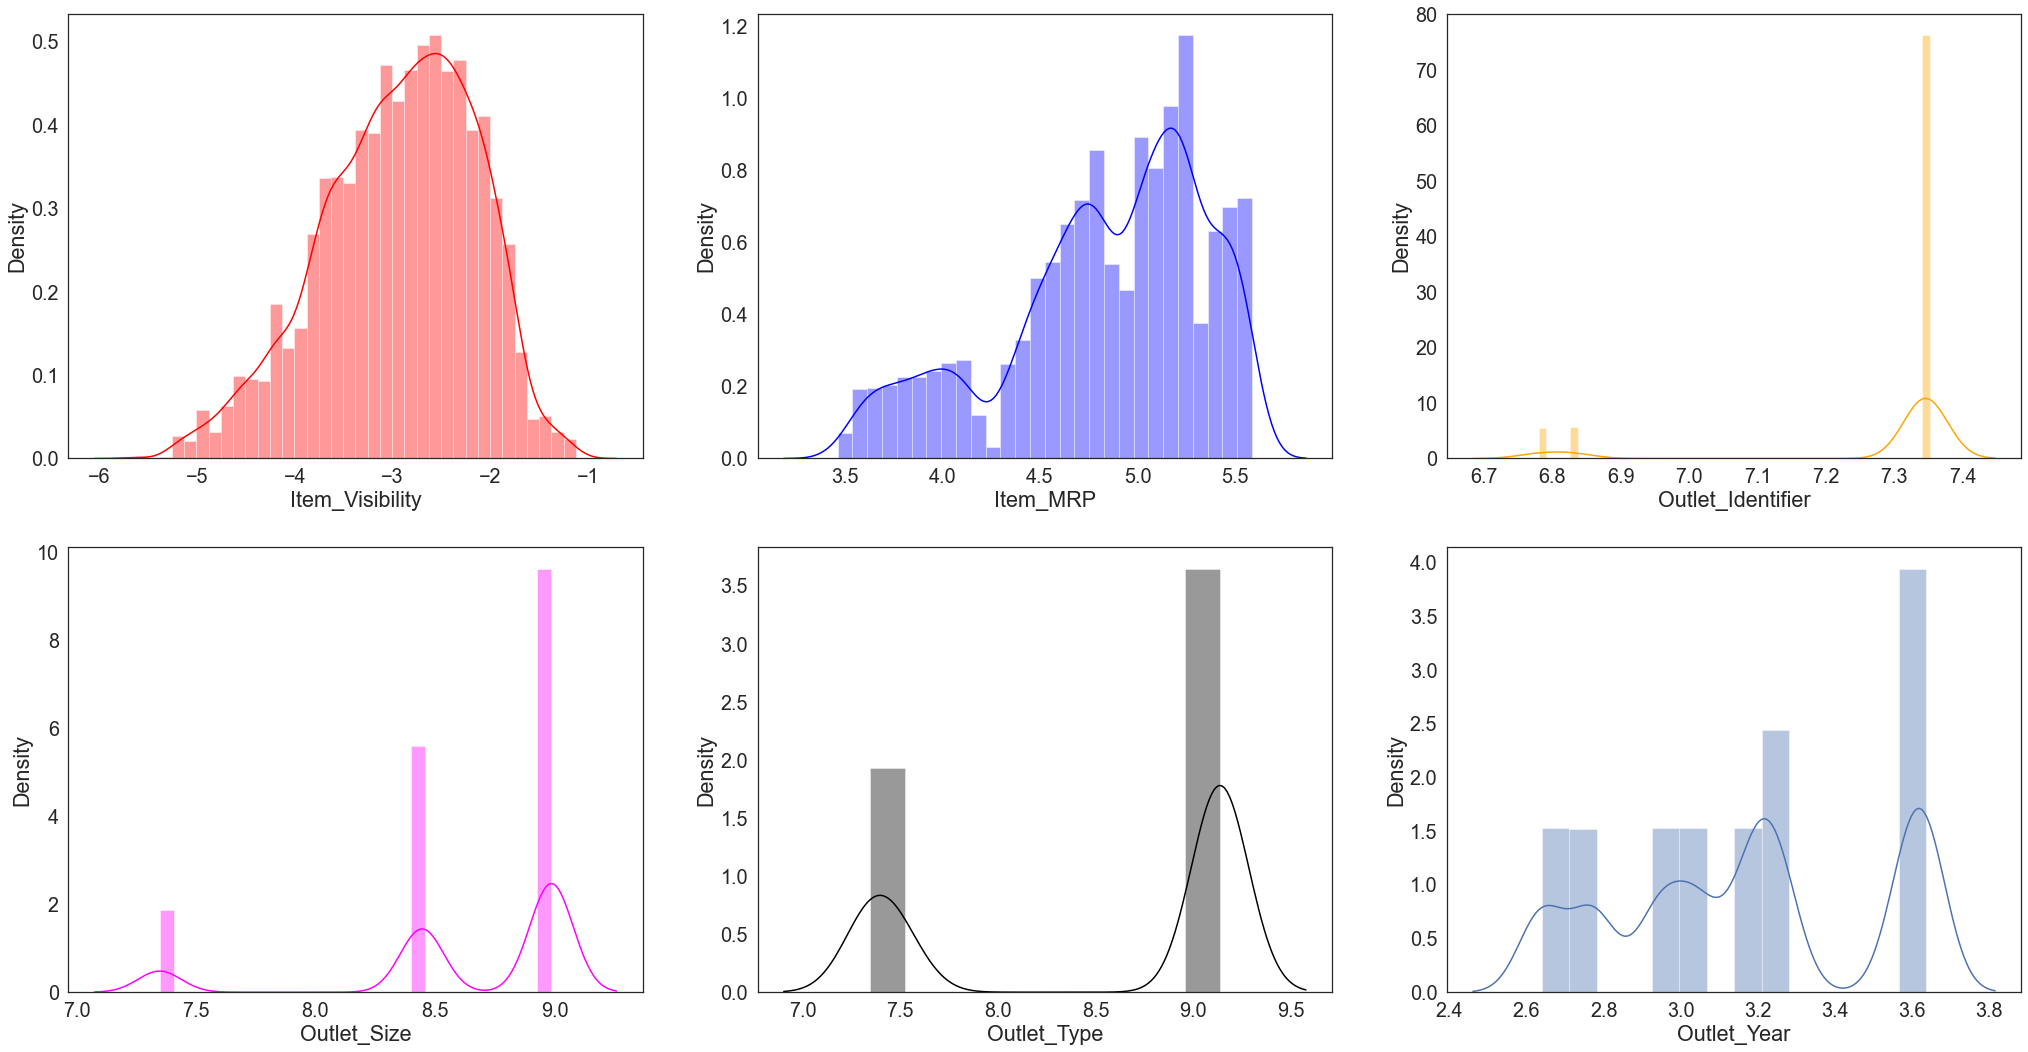

In [87]:
fig, ax = plt.subplots(2,3,figsize = (35,18))
sns.distplot(test_["Item_Visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(test_["Item_MRP"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(test_["Outlet_Identifier"], kde =True, ax=ax[0,2], color = "orange")
sns.distplot(test_["Outlet_Size"], kde =True, ax=ax[1,0], color = "magenta")
sns.distplot(test_["Outlet_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(test_["Outlet_Year"], kde =True, ax=ax[1,2])

In [88]:
test_.head(10).style.set_properties(**{'border': '1px solid black'})

In [89]:
# --- Applying Linear Regression model to dataset ---
item_outsale_pred = reg.predict(test_)
item_outsale_pred

array([7.35281546, 7.02757116, 6.23741794, ..., 7.48754227, 7.94021682,
       7.08316885])

In [90]:
# --- Performing inverse transformation ---
actual_item_outsale = np.exp(item_outsale_pred+1)
actual_item_outsale

array([4242.10742543, 3064.28995454, 1390.4989808 , ..., 4853.92178681,
       7632.85182535, 3239.48242958])

In [91]:
# --- ADDING THE PREDICTED ITEM_OUTLET_SALE COLUMNS TO TEST DATA ---
test = pd.read_csv("C:/Users/Meghna Midya/Downloads/Dataset/Test.csv")
test["Item_Outlet_Sales"] = actual_item_outsale

In [92]:
test

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1        4242.107425  
1     Supermarket Type1        3064.289955  
2         Grocery Store        1390.498981  
3     Supermarket Type1        5497.881560  
4     Supermarket Type3       14572.430881  
...                 ...                ...  
5676  Supermarket Type1        6489.026943  
5677  Supermarket Type2        6165.326623  
5678  Supermarket Type1        4853.921787  
5679  Supermarket Type1        7632.851825  
5680  Supermarket Type1        3239.482430  

[5681 rows x 12 columns]

In [93]:
test.to_csv('result.csv')